# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [171]:
# stundent details example: John S. 9812
#                       student details 1: Yaron B 6912


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Goal: To better understand the implications of class imbalance in image classification tasks.
Propmpt1:
    "I'm working on classifying brain tumor MRI images into three types (Glioma, Meningioma, Tumor). My dataset seems fairly balanced with similar counts for each. But for my understanding, what kind of problems usually come up if image datasets aren't balanced? How might that affect how the model learns?"
    
Propmpt2:
    "so a smaller class might get overlooked by the model. What are some common ways to deal with class imbalance when you're working with image data, especially for deep learning models? I've heard of oversampling and undersampling, but are there other techniques good for images?"
    
Propmpt3: 
    "So, when it comes to evaluating the model, if I did have a bit of an imbalance, is looking at overall accuracy still a good measure? Or should I be focusing more on things like F1-score, precision, and recall for each class individually?"


AI agent name 2: ChatGPT
Goal: To clarify the purpose and implementation details of Stratified K-Fold Cross-Validation.
Propmpt1:
    "I'm planning to use cross-validation to evaluate my brain tumor classification model. I've come across Stratified K-Fold and it seems recommended for classification. Could you explain what makes Stratified K-Fold different from regular K-Fold and why it's often preferred, particularly if there's any chance of class sizes not being perfectly even?"
    
Propmpt2:
    "Okay, so it tries to keep the class proportions the same in each fold, which is good. When I'm actually setting this up for my MRI image dataset, do I just split my list of image file paths? Also, with data augmentation, is it better to augment all the images before splitting into folds, or should I only augment the training data within each fold to avoid data leakage?"
    
Propmpt3: 
    "After running Stratified K-Fold, I'll have performance metrics like F1-score from each fold. What's the standard way to combine these scores to report an overall estimate of how well my model is performing? Is it usually just an average of the F1-scores?"

</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

The learning problem is a supervised classification task focused on identifying brain tumor types from MRI images. 
The goal is to categorize images into three classes: Glioma, Meningioma, and Tumor. 
The dataset, sourced from the "Bangladesh Brain Cancer MRI Dataset" on Mendeley Data, consists of a total of 6056 MRI images. 
These images are divided into Brain_Glioma (2004 images), Brain_Menin (2004 images), 
and Brain Tumor (2048 images). All images are provided at a resolution of 512x512 pixels. 
This project aims to develop a model capable of accurately classifying these MRI scans.
    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [172]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from PIL import Image

sns.set_style('darkgrid')

In [173]:
dataset_base_path = 'Brain_Cancer raw MRI data/Brain_Cancer/'

classes_map = {
    'brain_glioma': 'Glioma',
    'brain_menin': 'Menin', 
    'brain_tumor': 'Tumor'  
}

filepaths = []
labels = []


if not os.path.exists(dataset_base_path):
    print(f"ERROR: Dataset base path does not exist: {dataset_base_path}")
    print("Please ensure the 'Brain_Cancer raw MRI data' directory is correctly placed or update the path.")
else:
    for dir_name, label_name in classes_map.items():
        class_path = os.path.join(dataset_base_path, dir_name)
        if not os.path.isdir(class_path):
            print(f"Warning: Directory for class '{label_name}' (expected: '{dir_name}') not found at '{class_path}'. Skipping.")
            continue

        image_patterns = ['*.jpg', '*.jpeg', '*.png'] 
        class_image_paths = []
        for pattern in image_patterns:
            class_image_paths.extend(glob.glob(os.path.join(class_path, pattern)))

        if not class_image_paths:
            print(f"Warning: No images found for class '{label_name}' in directory '{class_path}'.")
        else:
            for img_path in class_image_paths:
                filepaths.append(img_path)
                labels.append(label_name)

In [174]:
if not filepaths: 
    print("ERROR: No image filepaths were loaded. Cannot create DataFrame.")
    print("Please check the 'dataset_base_path' in the previous cell and ensure image files exist.")
    image_df = pd.DataFrame(columns=['filepath', 'label']) # Create empty df to avoid NameError
else:
    image_df = pd.DataFrame({'filepath': filepaths, 'label': labels})
    print(f"Total images loaded into DataFrame: {len(image_df)}")
    if not image_df.empty:
        print("\nSample of the initial DataFrame (first 5 rows):")
        print(image_df.head()) 
        print("\nClass distribution in the original dataset:")
        print(image_df['label'].value_counts().to_frame())
    else:
        print("Warning: image_df is empty after attempting to create it.")


Total images loaded into DataFrame: 6056

Sample of the initial DataFrame (first 5 rows):
                                            filepath   label
0  Brain_Cancer raw MRI data/Brain_Cancer/brain_g...  Glioma
1  Brain_Cancer raw MRI data/Brain_Cancer/brain_g...  Glioma
2  Brain_Cancer raw MRI data/Brain_Cancer/brain_g...  Glioma
3  Brain_Cancer raw MRI data/Brain_Cancer/brain_g...  Glioma
4  Brain_Cancer raw MRI data/Brain_Cancer/brain_g...  Glioma

Class distribution in the original dataset:
        count
label        
Tumor    2048
Glioma   2004
Menin    2004


In [175]:
if 'image_df' not in locals() or image_df.empty:
    print("ERROR: 'image_df' is not defined or is empty. Cannot split data.")
    train_df = pd.DataFrame(columns=['filepath', 'label'])
    test_df = pd.DataFrame(columns=['filepath', 'label'])
else:
    # Split data into training and testing sets (80/20 split, stratified)
    train_df, test_df = train_test_split(
        image_df,
        test_size=0.2,
        random_state=42, 
        stratify=image_df['label'] if not image_df['label'].empty else None
    )
    print(f"Shape of training data (train_df): {train_df.shape}")
    print(f"Shape of testing data (test_df): {test_df.shape}")

    print("\nClass distribution in training set after split:")
    print(train_df['label'].value_counts().to_frame())

    print("\nClass distribution in testing set after split:")
    print(test_df['label'].value_counts().to_frame())

    print("\nFirst 5 rows of train_df:")
    print(train_df.head())

    print("\nFirst 5 rows of test_df:")
    print(test_df.head())

Shape of training data (train_df): (4844, 2)
Shape of testing data (test_df): (1212, 2)

Class distribution in training set after split:
        count
label        
Tumor    1638
Glioma   1603
Menin    1603

Class distribution in testing set after split:
        count
label        
Tumor     410
Glioma    401
Menin     401

First 5 rows of train_df:
                                               filepath   label
4415  Brain_Cancer raw MRI data/Brain_Cancer/brain_t...   Tumor
5721  Brain_Cancer raw MRI data/Brain_Cancer/brain_t...   Tumor
1565  Brain_Cancer raw MRI data/Brain_Cancer/brain_g...  Glioma
3875  Brain_Cancer raw MRI data/Brain_Cancer/brain_m...   Menin
2758  Brain_Cancer raw MRI data/Brain_Cancer/brain_m...   Menin

First 5 rows of test_df:
                                               filepath   label
1186  Brain_Cancer raw MRI data/Brain_Cancer/brain_g...  Glioma
2327  Brain_Cancer raw MRI data/Brain_Cancer/brain_m...   Menin
130   Brain_Cancer raw MRI data/Brain_Cancer/b

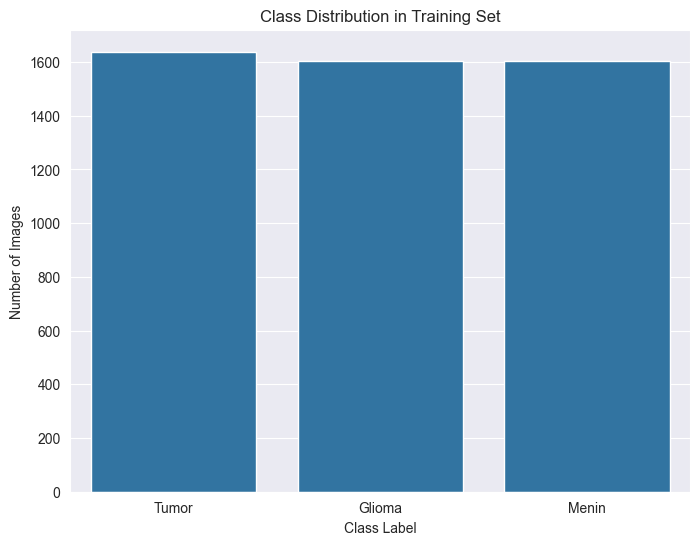

Class counts in training set:
        count
label        
Tumor    1638
Glioma   1603
Menin    1603


In [176]:
# EDA - Class Distribution in Testing Set

if 'train_df' not in locals() or train_df.empty:
    print("Warning: 'train_df' is not defined or is empty. Skipping training set distribution plot.")
else:
    # Visualize the number of images per class in the training set.
    # This helps to check for class imbalance, which might affect model training.
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_df, x='label', order=train_df['label'].value_counts().index)
    plt.title('Class Distribution in Training Set')
    plt.xlabel('Class Label')
    plt.ylabel('Number of Images')
    # plt.savefig('eda_train_class_distribution.png') # Optional: save plot
    plt.show() # Display the plot

    print("Class counts in training set:")
    print(train_df['label'].value_counts().to_frame())

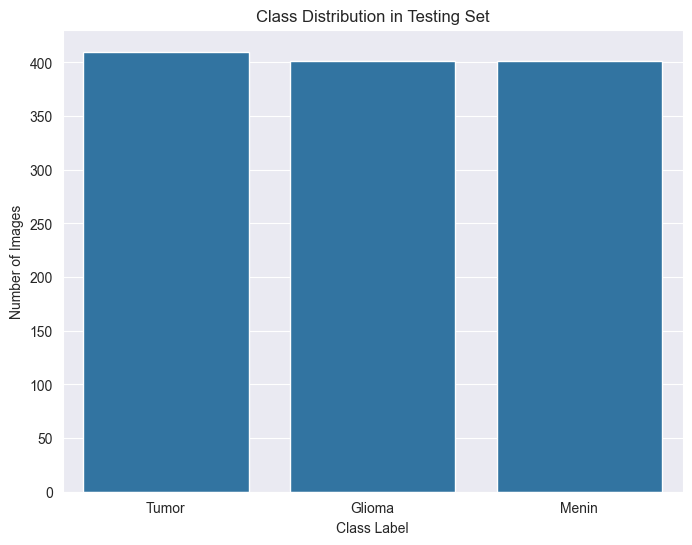

Class counts in testing set:
        count
label        
Tumor     410
Glioma    401
Menin     401


In [177]:
# EDA - Class Distribution in Testing Set

if 'test_df' not in locals() or test_df.empty:
    print("Warning: 'test_df' is not defined or is empty. Skipping testing set distribution plot.")
else:
    # Visualize the number of images per class in the testing set.
    # This helps ensure the test set has a representative distribution for fair evaluation.
    plt.figure(figsize=(8, 6))
    sns.countplot(data=test_df, x='label', order=test_df['label'].value_counts().index)
    plt.title('Class Distribution in Testing Set')
    plt.xlabel('Class Label')
    plt.ylabel('Number of Images')
    # plt.savefig('eda_test_class_distribution.png') # Optional: save plot
    plt.show() # Display the plot

    print("Class counts in testing set:")
    print(test_df['label'].value_counts().to_frame())

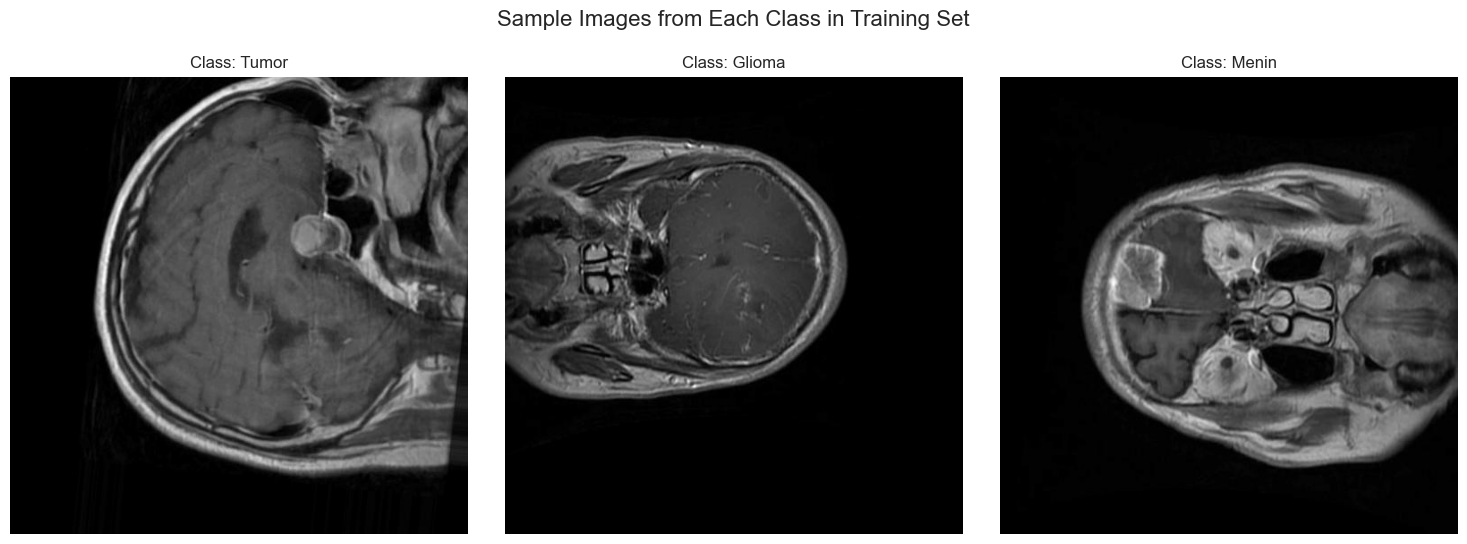

In [178]:
# EDA - Sample Images from Each Class (Training Set)

if 'train_df' not in locals() or train_df.empty:
    print("Warning: 'train_df' is not defined or is empty. Skipping sample image display.")
else:
    unique_labels = train_df['label'].unique()
    num_unique_labels = len(unique_labels)

    if num_unique_labels > 0:
        # Visually inspect a sample image from each class to understand data characteristics.
        plt.figure(figsize=(5 * num_unique_labels, 5.5)) # Adjust size based on number of classes
        for i, label_class in enumerate(unique_labels):
            sample_filepath_series = train_df[train_df['label'] == label_class]['filepath']
            if not sample_filepath_series.empty:
                sample_filepath = sample_filepath_series.iloc[0] # Take the first sample
                try:
                    img = Image.open(sample_filepath)
                    plt.subplot(1, num_unique_labels, i + 1)
                    plt.imshow(img, cmap='gray') # Assuming grayscale, adjust if color
                    plt.title(f"Class: {label_class}")
                    plt.axis('off')
                except FileNotFoundError:
                    print(f"Error: Image file not found at {sample_filepath}")
                except Exception as e:
                    print(f"Error loading image {sample_filepath}: {e}")
            else:
                print(f"No samples found for label '{label_class}' in train_df.")
        
        plt.suptitle('Sample Images from Each Class in Training Set', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to prevent title overlap
        # plt.savefig('eda_sample_images.png') # Optional: save plot
        plt.show()
    else:
        print("No unique labels found in train_df to display sample images.")

In [179]:
# EDA - Summary Table of Image Counts

if 'image_df' not in locals() or 'train_df' not in locals() or 'test_df' not in locals():
    print("Warning: One or more DataFrames ('image_df', 'train_df', 'test_df') not found. Cannot create full summary table.")
    # Attempt to create a partial summary if some DFs exist
    summary_parts = []
    if 'image_df' in locals() and not image_df.empty:
        summary_parts.append(image_df['label'].value_counts().rename('Original_Dataset'))
    if 'train_df' in locals() and not train_df.empty:
        summary_parts.append(train_df['label'].value_counts().rename('Training_Set'))
    if 'test_df' in locals() and not test_df.empty:
        summary_parts.append(test_df['label'].value_counts().rename('Testing_Set'))
    
    if summary_parts:
        summary_df = pd.concat(summary_parts, axis=1).fillna(0).astype(int)
        summary_df.index.name = 'Class'
        print("Partial Summary of Image Counts per Class:")
        print(summary_df)
    else:
        print("No data available to create even a partial summary table.")

elif image_df.empty or train_df.empty or test_df.empty:
    print("Warning: One or more DataFrames ('image_df', 'train_df', 'test_df') are empty. Summary table might be incomplete or misleading.")
    original_counts = image_df['label'].value_counts().rename('Original_Dataset') if not image_df.empty else pd.Series(name='Original_Dataset', dtype='int')
    train_counts = train_df['label'].value_counts().rename('Training_Set') if not train_df.empty else pd.Series(name='Training_Set', dtype='int')
    test_counts = test_df['label'].value_counts().rename('Testing_Set') if not test_df.empty else pd.Series(name='Testing_Set', dtype='int')

    summary_df = pd.concat([original_counts, train_counts, test_counts], axis=1).fillna(0).astype(int)
    summary_df.index.name = 'Class'
    print("Summary of Image Counts per Class (some sets might be empty):")
    print(summary_df)
else:
    # Provide a consolidated view of data distribution across original, training, and testing sets.
    original_counts = image_df['label'].value_counts().rename('Original_Dataset')
    train_counts = train_df['label'].value_counts().rename('Training_Set')
    test_counts = test_df['label'].value_counts().rename('Testing_Set')

    summary_df = pd.concat([original_counts, train_counts, test_counts], axis=1).fillna(0).astype(int)
    summary_df.index.name = 'Class'
    print("Summary of Image Counts per Class:")
    print(summary_df)

Summary of Image Counts per Class:
        Original_Dataset  Training_Set  Testing_Set
Class                                              
Tumor               2048          1638          410
Glioma              2004          1603          401
Menin               2004          1603          401


## Part 3 - Experiments
You could add as many code cells as needed

In [180]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [181]:
IMAGE_WIDTH = 224  # Target width for resizing images
IMAGE_HEIGHT = 224 # Target height for resizing images
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3 
BATCH_SIZE = 32    # Number of images to process in each batch

In [182]:
# Load Training Data 

print("--- Part 3: Loading Training Data for Cross-Validation ---")

if 'train_df' not in globals():
    print("train_df not found in global scope. Attempting to load from CSV...")
    try:
        if os.path.exists('train_df_from_part2.csv'):
            train_df = pd.read_csv('train_df_from_part2.csv')
            print(f"Loaded train_df from train_df_from_part2.csv. Shape: {train_df.shape}")
            if 'filepath' not in train_df.columns or 'label' not in train_df.columns:
                raise ValueError("train_df must contain 'filepath' and 'label' columns.")
        else:
            raise FileNotFoundError("train_df_from_part2.csv not found. Ensure Part 2 was run and saved the file.")
    except Exception as e:
        print(f"ERROR: Could not load train_df: {e}")
        print("Creating a minimal DUMMY train_df for structural execution of cross-validation.")
        # Define dummy data structure matching expected columns.
        _data = {'filepath': [f'dummy_cv/img{i}_{l}.jpg' for l in ['G','M','T'] for i in range(20)], # Example labels
                 'label':    [l for l in ['Glioma','Menin','Tumor'] for i in range(20)]} # Ensure labels match
        train_df = pd.DataFrame(_data)
        # Create dummy image files if they don't exist, so ImageDataGenerator doesn't fail.
        if not os.path.exists('dummy_cv'):
            os.makedirs('dummy_cv')
            print("Created dummy_cv directory for dummy image files.")
        for _fp in train_df['filepath']:
            if not os.path.exists(_fp):
                try:
                    open(_fp, 'a').close() # Create an empty file
                except IOError as ioe:
                    print(f"Warning: Could not create dummy file {_fp}: {ioe}")
        print(f"Using DUMMY train_df. Shape: {train_df.shape}")
        print("Note: Results from dummy data are not meaningful for model evaluation.")

elif 'train_df' in globals() and not train_df.empty:
    print(f"train_df already exists in global scope. Shape: {train_df.shape}")
    if 'filepath' not in train_df.columns or 'label' not in train_df.columns:
        print("ERROR: Existing train_df is missing 'filepath' or 'label' columns. This may cause issues.")
else: # train_df exists but is empty
    print("CRITICAL: train_df exists in global scope but is empty. Cannot proceed effectively.")

if 'train_df' in globals():
    print(f"train_df available. Columns: {train_df.columns.tolist()}")
else:
    print("CRITICAL: train_df is not defined after loading attempts. Subsequent steps will likely fail.")

--- Part 3: Loading Training Data for Cross-Validation ---
train_df already exists in global scope. Shape: (4844, 2)
train_df available. Columns: ['filepath', 'label']


In [183]:
# Derive Class Labels and Number of Classes
# Derives CLASS_LABELS and NUM_CLASSES from the loaded train_df.

print("--- Deriving Class Labels and Number of Classes ---")

if 'train_df' in globals() and not train_df.empty and 'label' in train_df.columns:
    CLASS_LABELS = sorted(train_df['label'].unique().tolist())
    NUM_CLASSES = len(CLASS_LABELS)
    print(f"Successfully derived CLASS_LABELS: {CLASS_LABELS}")
    print(f"Successfully derived NUM_CLASSES: {NUM_CLASSES}")
elif 'train_df' in globals() and ('label' not in train_df.columns):
    print("CRITICAL ERROR: 'label' column not found in train_df. Cannot derive CLASS_LABELS.")
    # Fallback or error state for notebook execution
    CLASS_LABELS = ['Glioma', 'Menin', 'Tumor'] # Default/fallback
    NUM_CLASSES = 3
    print(f"Using FALLBACK CLASS_LABELS: {CLASS_LABELS}, NUM_CLASSES: {NUM_CLASSES}. This may lead to incorrect behavior.")
else:
    print("CRITICAL ERROR: train_df is not available or is empty. Cannot derive CLASS_LABELS.")
    # Fallback or error state for notebook execution
    CLASS_LABELS = ['Glioma', 'Menin', 'Tumor'] # Default/fallback
    NUM_CLASSES = 3
    print(f"Using FALLBACK CLASS_LABELS: {CLASS_LABELS}, NUM_CLASSES: {NUM_CLASSES}. This may lead to incorrect behavior.")

if NUM_CLASSES == 0:
    print("CRITICAL WARNING: NUM_CLASSES is 0. This will cause errors. Defaulting to 3 for safety.")
    CLASS_LABELS = ['Glioma_fallback', 'Menin_fallback', 'Tumor_fallback'] 
    NUM_CLASSES = 3

--- Deriving Class Labels and Number of Classes ---
Successfully derived CLASS_LABELS: ['Glioma', 'Menin', 'Tumor']
Successfully derived NUM_CLASSES: 3


In [184]:
# Helper Functions

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

print("--- Defining Helper Functions (macro_f1, plot_history) ---")

def macro_f1(y_true, y_pred_classes):
    """
    Calculates the Macro F1 score.
    Handles zero division by returning 0 for that class.
    """
    return f1_score(y_true, y_pred_classes, average='macro', zero_division=0)

def plot_history(history, fold_num, param_combo_name=""):
    """
    Plots training and validation accuracy and loss from a Keras history object.
    """
    if history is None or not hasattr(history, 'history'):
        print(f"Warning: History object for Fold {fold_num} ({param_combo_name}) is None or invalid. Skipping plot.")
        return

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot Accuracy
    if 'accuracy' in history.history and 'val_accuracy' in history.history:
        ax1.plot(history.history['accuracy'], label='Train Accuracy')
        ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
        ax1.set_title(f'Fold {fold_num} Accuracy\n({param_combo_name})')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
    else:
        ax1.text(0.5, 0.5, 'Accuracy data not available', ha='center', va='center')
        ax1.set_title(f'Fold {fold_num} Accuracy\n({param_combo_name})')


    # Plot Loss
    if 'loss' in history.history and 'val_loss' in history.history:
        ax2.plot(history.history['loss'], label='Train Loss')
        ax2.plot(history.history['val_loss'], label='Val Loss')
        ax2.set_title(f'Fold {fold_num} Loss\n({param_combo_name})')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Loss')
        ax2.legend()
    else:
        ax2.text(0.5, 0.5, 'Loss data not available', ha='center', va='center')
        ax2.set_title(f'Fold {fold_num} Loss\n({param_combo_name})')

    plt.tight_layout()
    plt.show()

--- Defining Helper Functions (macro_f1, plot_history) ---


In [185]:
# Model Definition (Custom CNN)
# Defines the custom Convolutional Neural Network (CNN) model architecture.
# Includes placeholders for pre-trained models as in the original script.

try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
    from tensorflow.keras.optimizers import Adam
except ImportError:
    print("ERROR: TensorFlow/Keras components for model definition are not available.")

print("--- Defining Custom CNN Model Architecture ---")

def create_custom_cnn_model(input_shape, num_classes, learning_rate=0.001, dropout_rate=0.5):
    """
    Creates, compiles, and returns a custom CNN model.
    """
    if not all([input_shape, num_classes]):
        raise ValueError("input_shape and num_classes must be provided for model creation.")

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name="conv2d_1"),
        BatchNormalization(name="batchnorm_1"),
        MaxPooling2D((2, 2), name="maxpool_1"),

        Conv2D(64, (3, 3), activation='relu', name="conv2d_2"),
        BatchNormalization(name="batchnorm_2"),
        MaxPooling2D((2, 2), name="maxpool_2"),

        Conv2D(128, (3, 3), activation='relu', name="conv2d_3"),
        BatchNormalization(name="batchnorm_3"),
        MaxPooling2D((2, 2), name="maxpool_3"),

        Flatten(name="flatten"),
        Dense(128, activation='relu', name="dense_1"),
        Dropout(dropout_rate, name="dropout_1"),
        Dense(num_classes, activation='softmax', name="output_dense")
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # model.summary()
    return model

--- Defining Custom CNN Model Architecture ---


In [186]:
# Hyperparameter Grid and Experiments Setup
# Defines the hyperparameter grid for the custom CNN model and
# sets up the list of experiments to run.

print("--- Defining Hyperparameter Grid and Experiments Setup ---")

# Hyperparameter grid for the Custom CNN model
param_grid_custom_cnn = {
    'learning_rate': [0.001, 0.0005],  
    'dropout_rate': [0.3, 0.5],       
    'epochs': [15, 25]                
}

experiments_setup = [
    ("CustomCNN", create_custom_cnn_model, param_grid_custom_cnn)
]

--- Defining Hyperparameter Grid and Experiments Setup ---


In [187]:
# Data Augmentation Configurations
# Defines ImageDataGenerator instances for training and validation data.
# Training generator includes augmentation techniques.
# Validation generator only rescales pixel values.

try:
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
except ImportError:
    print("ERROR: ImageDataGenerator from TensorFlow/Keras is not available.")

print("--- Defining Data Augmentation Configurations ---")

# Default data augmentation for training images
train_datagen_default = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values to [0, 1]
    rotation_range=30,          # Randomly rotate images by up to 30 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally by up to 10% of width
    height_shift_range=0.1,     # Randomly shift images vertically by up to 10% of height
    shear_range=0.1,            # Apply shear transformation
    zoom_range=0.1,             # Randomly zoom into images
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Strategy for filling in newly created pixels
)

val_datagen_default = ImageDataGenerator(
    rescale=1./255              # Normalize pixel values to [0, 1]
)

--- Defining Data Augmentation Configurations ---


In [188]:
# Cross-Validation Setup
# Initializes parameters for N-fold cross-validation,
# including the StratifiedKFold object and a list to store results.

from sklearn.model_selection import StratifiedKFold

print("--- Setting up Cross-Validation Parameters ---")

# Number of folds for cross-validation
N_SPLITS = 5  # As per requirements

# Initialize StratifiedKFold for splitting data while preserving class proportions
# random_state ensures reproducibility of splits
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# List to store a summary of results from each experiment configuration and fold
results_summary = []

--- Setting up Cross-Validation Parameters ---


In [189]:
# Cross-Validation Main Loop Start
# This block initiates the main experiment loop. It first checks if essential data
# (train_df, NUM_CLASSES) is available. Then, it iterates through each
# model configuration defined in 'experiments_setup'. For each configuration,
# it sets up the current hyperparameters

print(f"\n--- Starting Main Experiment Loop ({N_SPLITS}-Fold Cross-Validation) ---")

if 'train_df' not in globals() or train_df.empty or 'NUM_CLASSES' not in globals() or NUM_CLASSES == 0:
    print("CRITICAL: train_df not loaded, is empty, or NUM_CLASSES not set correctly.")
    print("Aborting experiment loop. Please ensure previous blocks (data loading, label derivation) executed successfully.")
    _EXPERIMENT_LOOP_CAN_PROCEED = False
else:
    print(f"Proceeding with {N_SPLITS}-Fold Cross-Validation for {len(experiments_setup)} model configuration(s).")
    _EXPERIMENT_LOOP_CAN_PROCEED = True

if _EXPERIMENT_LOOP_CAN_PROCEED:
    if experiments_setup:
        model_name, model_fn, param_grid = experiments_setup[0] # Process first one for block logic

        print(f"\n===== Preparing for Model: {model_name} =====")

        current_params = {key: values[0] for key, values in param_grid.items()}
        param_combo_name = "_".join([f"{k}_{v}" for k, v in current_params.items()])

        print(f"--- Using Hyperparameters for this run: {current_params} ---")
        print(f"--- Parameter Combination Name: {param_combo_name} ---")

        fold_f1_scores = []
        fold_histories = []
    else:
        print("No experiments defined in 'experiments_setup'. Loop will not run.")
        _EXPERIMENT_LOOP_CAN_PROCEED = False # Ensure next blocks don't run if no experiments
else:
    print("Skipping main experiment loop due to missing data or configuration.")


--- Starting Main Experiment Loop (5-Fold Cross-Validation) ---
Proceeding with 5-Fold Cross-Validation for 1 model configuration(s).

===== Preparing for Model: CustomCNN =====
--- Using Hyperparameters for this run: {'learning_rate': 0.001, 'dropout_rate': 0.3, 'epochs': 15} ---
--- Parameter Combination Name: learning_rate_0.001_dropout_rate_0.3_epochs_15 ---


In [190]:
# Cross-Validation Fold Loop
# This block executes the inner loop of the cross-validation process, iterating
# through each fold. For each fold, it prepares data, trains the model,
# evaluates it, and stores results.

import numpy as np
try:
    import tensorflow as tf
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
except ImportError:
    print("ERROR: TensorFlow/Keras components for fold loop are not available.")
    _EXPERIMENT_LOOP_CAN_PROCEED = False # Prevent execution if essential imports fail

print(f"\n--- Entering Cross-Validation Fold Loop ---")

if '_EXPERIMENT_LOOP_CAN_PROCEED' in globals() and _EXPERIMENT_LOOP_CAN_PROCEED:
    if 'train_df' in globals() and not train_df.empty and 'label' in train_df.columns:
        # The skf.split needs X and y. y is train_df['label'] for stratification.
        # X can be a dummy array of the same length as train_df, or train_df itself.
        X_for_split = np.zeros(len(train_df)) # Dummy X for splitting indices

        for fold_num, (train_idx, val_idx) in enumerate(skf.split(X_for_split, train_df['label'])):
            print(f"\n--- Fold {fold_num + 1}/{N_SPLITS} for {model_name} ({param_combo_name}) ---")

            fold_train_df = train_df.iloc[train_idx]
            fold_val_df = train_df.iloc[val_idx]

            print(f"Fold {fold_num + 1}: Train size: {len(fold_train_df)}, Val size: {len(fold_val_df)}")

            # Create data generators for the current fold
            # Assumes train_datagen_default and val_datagen_default are defined
            train_generator_fold = train_datagen_default.flow_from_dataframe(
                dataframe=fold_train_df,
                x_col='filepath',
                y_col='label',
                target_size=IMAGE_SIZE,
                color_mode='rgb' if IMAGE_CHANNELS == 3 else 'grayscale',
                class_mode='categorical',
                batch_size=BATCH_SIZE,
                shuffle=True,
                classes=CLASS_LABELS, # Ensure CLASS_LABELS is correctly derived
                seed=42 + fold_num # Different seed for each fold's shuffle
            )

            val_generator_fold = val_datagen_default.flow_from_dataframe(
                dataframe=fold_val_df,
                x_col='filepath',
                y_col='label',
                target_size=IMAGE_SIZE,
                color_mode='rgb' if IMAGE_CHANNELS == 3 else 'grayscale',
                class_mode='categorical',
                batch_size=BATCH_SIZE,
                shuffle=False, # No shuffle for validation
                classes=CLASS_LABELS
            )

            if train_generator_fold.samples == 0 or val_generator_fold.samples == 0:
                print(f"ERROR: Fold {fold_num + 1} - Train or Val generator has 0 samples. Skipping fold.")
                print(f"  Train samples: {train_generator_fold.samples}, Val samples: {val_generator_fold.samples}")
                fold_f1_scores.append(np.nan) # Record NaN or skip appending
                if 'fold_histories' in globals(): fold_histories.append(None)
                continue

            model_instance = model_fn(
                input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS),
                num_classes=NUM_CLASSES,
                **{k: v for k, v in current_params.items() if k in model_fn.__code__.co_varnames and k != 'epochs'}
            )

            # Callbacks
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
            reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

            print(f"Starting training for Fold {fold_num + 1}...")
            history = model_instance.fit(
                train_generator_fold,
                steps_per_epoch=max(1, train_generator_fold.samples // BATCH_SIZE),
                validation_data=val_generator_fold,
                validation_steps=max(1, val_generator_fold.samples // BATCH_SIZE),
                epochs=current_params.get('epochs', 10), # Get epochs from current_params
                callbacks=[early_stopping, reduce_lr],
                verbose=1
            )
            if 'fold_histories' in globals(): fold_histories.append(history)

            print(f"Evaluating Fold {fold_num + 1}...")
            y_pred_proba_val = model_instance.predict(val_generator_fold, steps=max(1, val_generator_fold.samples // BATCH_SIZE))
            y_pred_classes_val = np.argmax(y_pred_proba_val, axis=1)

            # Ensure true labels match the length of predictions if val_generator_fold.samples % BATCH_SIZE != 0
            num_predictions = len(y_pred_classes_val)
            true_labels_strings_val = fold_val_df['label'].iloc[:num_predictions].tolist()

            # Map string labels to numeric, ensuring CLASS_LABELS is correct
            if 'CLASS_LABELS' in globals():
                label_to_index_map = {label: i for i, label in enumerate(CLASS_LABELS)}
                y_true_val_numeric = [label_to_index_map.get(lbl, -1) for lbl in true_labels_strings_val]
                # Filter out any -1 if labels were missing from map (should not happen with good data prep)
                valid_indices = [i for i, x in enumerate(y_true_val_numeric) if x != -1]
                y_true_val_numeric = [y_true_val_numeric[i] for i in valid_indices]
                y_pred_classes_val_filtered = [y_pred_classes_val[i] for i in valid_indices]


                if not y_true_val_numeric: # Check if list is empty after filtering
                     print(f"Warning: Fold {fold_num + 1} - No valid true labels found after mapping. Skipping F1 calculation.")
                     f1_val = np.nan
                else:
                    f1_val = macro_f1(y_true_val_numeric, y_pred_classes_val_filtered) # Assumes macro_f1 is defined
            else:
                print("CRITICAL: CLASS_LABELS not defined. Cannot calculate F1 score accurately.")
                f1_val = np.nan # Cannot compute F1 without label mapping

            fold_f1_scores.append(f1_val)
            print(f"Fold {fold_num + 1} Validation Macro F1: {f1_val:.4f}")

            # Clear Keras session and delete model to free up memory
            tf.keras.backend.clear_session()
            del model_instance, train_generator_fold, val_generator_fold, history
            print(f"Fold {fold_num + 1} completed and resources cleared.")

    else:
        print("Fold loop skipped: train_df not available or 'label' column missing.")
else:
    print("Fold loop skipped: _EXPERIMENT_LOOP_CAN_PROCEED is False (likely due to earlier critical errors).")

print(f"--- Exiting Cross-Validation Fold Loop ---")


--- Entering Cross-Validation Fold Loop ---

--- Fold 1/5 for CustomCNN (learning_rate_0.001_dropout_rate_0.3_epochs_15) ---
Fold 1: Train size: 3875, Val size: 969
Found 3875 validated image filenames belonging to 3 classes.
Found 969 validated image filenames belonging to 3 classes.
Starting training for Fold 1...


C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.5119 - loss: 6.9614 - val_accuracy: 0.3396 - val_loss: 50.5548 - learning_rate: 0.0010
Epoch 2/15
  1/121 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - accuracy: 0.6667 - loss: 1.0473

C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.6667 - loss: 1.0473 - val_accuracy: 0.3396 - val_loss: 50.5337 - learning_rate: 0.0010
Epoch 3/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.5924 - loss: 0.9217 - val_accuracy: 0.5375 - val_loss: 5.2750 - learning_rate: 0.0010
Epoch 4/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.6562 - loss: 0.9109 - val_accuracy: 0.5490 - val_loss: 5.0803 - learning_rate: 0.0010
Epoch 5/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.6292 - loss: 0.8420 - val_accuracy: 0.6573 - val_loss: 0.8189 - learning_rate: 0.0010
Epoch 6/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.5938 - loss: 0.8797 - val_accuracy: 0.6500 - val_loss: 0.8250 - learning_rate: 0.0010
Epoch 7/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.6476 - loss: 0.8317 - val_accuracy: 0.7615 - val_loss: 0.7341 - learning_rate: 0.0010
Epoch 8/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7188 - loss: 0.7190 - val

C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.4942 - loss: 3.8846 - val_accuracy: 0.3385 - val_loss: 27.2353 - learning_rate: 0.0010
Epoch 2/15
  1/121 ━━━━━━━━━━━━━━━━━━━━ 2:41 1s/step - accuracy: 0.5625 - loss: 0.9028

C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.5625 - loss: 0.9028 - val_accuracy: 0.3385 - val_loss: 26.8783 - learning_rate: 0.0010
Epoch 3/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.5906 - loss: 0.8896 - val_accuracy: 0.4135 - val_loss: 1.3885 - learning_rate: 0.0010
Epoch 4/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6562 - loss: 0.8024 - val_accuracy: 0.3979 - val_loss: 1.4904 - learning_rate: 0.0010
Epoch 5/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.6134 - loss: 0.8156 - val_accuracy: 0.4990 - val_loss: 2.3274 - learning_rate: 0.0010
Epoch 6/15
  1/121 ━━━━━━━━━━━━━━━━━━━━ 2:39 1s/step - accuracy: 0.7812 - loss: 0.5722
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.7812 - loss: 0.5722 - val_accuracy: 0.4823 - val_loss: 2.4045 - learning_rate: 0.0010
Epoch 7/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.6600 - loss: 0.7194 - val

C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.5374 - loss: 4.9335 - val_accuracy: 0.3385 - val_loss: 35.7405 - learning_rate: 0.0010
Epoch 2/15
  1/121 ━━━━━━━━━━━━━━━━━━━━ 2:32 1s/step - accuracy: 0.5938 - loss: 0.9724

C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.5938 - loss: 0.9724 - val_accuracy: 0.3385 - val_loss: 35.8849 - learning_rate: 0.0010
Epoch 3/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.6032 - loss: 0.8843 - val_accuracy: 0.3406 - val_loss: 12.5308 - learning_rate: 0.0010
Epoch 4/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.6562 - loss: 0.7472 - val_accuracy: 0.3396 - val_loss: 13.0467 - learning_rate: 0.0010
Epoch 5/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.6237 - loss: 0.8829 - val_accuracy: 0.6958 - val_loss: 0.6939 - learning_rate: 0.0010
Epoch 6/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.6250 - loss: 1.4421 - val_accuracy: 0.6885 - val_loss: 0.7056 - learning_rate: 0.0010
Epoch 7/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.6564 - loss: 0.7734 - val_accuracy: 0.7740 - val_loss: 0.5989 - learning_rate: 0.0010
Epoch 8/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.7188 - loss: 0.7022 - v

C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.5273 - loss: 6.0562 - val_accuracy: 0.3333 - val_loss: 45.1359 - learning_rate: 0.0010
Epoch 2/15
  1/121 ━━━━━━━━━━━━━━━━━━━━ 2:19 1s/step - accuracy: 0.6562 - loss: 0.8822

C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6562 - loss: 0.8822 - val_accuracy: 0.3333 - val_loss: 45.1106 - learning_rate: 0.0010
Epoch 3/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.6167 - loss: 0.8557 - val_accuracy: 0.3406 - val_loss: 7.2802 - learning_rate: 0.0010
Epoch 4/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.5938 - loss: 0.7136 - val_accuracy: 0.3500 - val_loss: 6.6225 - learning_rate: 0.0010
Epoch 5/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.6457 - loss: 0.7832 - val_accuracy: 0.6781 - val_loss: 0.7141 - learning_rate: 0.0010
Epoch 6/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.6875 - loss: 0.6753 - val_accuracy: 0.6896 - val_loss: 0.7087 - learning_rate: 0.0010
Epoch 7/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.6543 - loss: 0.7225 - val_accuracy: 0.4177 - val_loss: 1.5097 - learning_rate: 0.0010
Epoch 8/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.7188 - loss: 0.6891 - val

C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.5008 - loss: 5.1933 - val_accuracy: 0.3271 - val_loss: 63.0093 - learning_rate: 0.0010
Epoch 2/15
  1/121 ━━━━━━━━━━━━━━━━━━━━ 2:52 1s/step - accuracy: 0.5938 - loss: 0.9253

C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.5938 - loss: 0.9253 - val_accuracy: 0.3271 - val_loss: 62.3534 - learning_rate: 0.0010
Epoch 3/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.5503 - loss: 0.9203 - val_accuracy: 0.4083 - val_loss: 17.3583 - learning_rate: 0.0010
Epoch 4/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.6875 - loss: 0.7520 - val_accuracy: 0.4073 - val_loss: 17.2441 - learning_rate: 0.0010
Epoch 5/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.6045 - loss: 0.8373 - val_accuracy: 0.4698 - val_loss: 12.0538 - learning_rate: 0.0010
Epoch 6/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.4375 - loss: 0.8367 - val_accuracy: 0.4573 - val_loss: 14.9909 - learning_rate: 0.0010
Epoch 7/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.5972 - loss: 0.9144 - val_accuracy: 0.7042 - val_loss: 0.8523 - learning_rate: 0.0010
Epoch 8/15
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.5938 - loss: 0.7787 -

In [191]:
# Cross-Validation Fold Results Aggregation
# This block is executed after all folds for a specific model configuration
# and hyperparameter set have been completed. It calculates the average
# and standard deviation of the F1 scores from the folds and appends
# this summary to the `results_summary` list.

import numpy as np

print(f"\n--- Aggregating Fold Results for {model_name} ({param_combo_name}) ---")

# Check if _EXPERIMENT_LOOP_CAN_PROCEED is True and relevant variables exist
if ('_EXPERIMENT_LOOP_CAN_PROCEED' in globals() and _EXPERIMENT_LOOP_CAN_PROCEED and
    'fold_f1_scores' in globals() and
    'model_name' in globals() and
    'current_params' in globals() and
    'param_combo_name' in globals() and
    'results_summary' in globals()):

    # Filter out NaN values from fold_f1_scores if any fold was skipped or failed
    valid_fold_f1_scores = [score for score in fold_f1_scores if not np.isnan(score)]

    if valid_fold_f1_scores:
        avg_f1 = np.mean(valid_fold_f1_scores)
        std_f1 = np.std(valid_fold_f1_scores)
        print(f"Average Macro F1 for {model_name} with params {param_combo_name}: {avg_f1:.4f} +/- {std_f1:.4f}")

        results_summary.append({
            'model_name': model_name,
            'params': current_params.copy(), 
            'param_combo_name': param_combo_name,
            'avg_macro_f1': avg_f1,
            'std_macro_f1': std_f1,
            'fold_f1_scores': valid_fold_f1_scores.copy() # Store the valid scores
        })
        print(f"Results for {param_combo_name} appended to results_summary.")
    elif fold_f1_scores: # Scores list exists but all were NaN or it was empty after filtering
        print(f"No valid F1 scores recorded for {model_name} with params {param_combo_name} to aggregate.")
        # Optionally append a record indicating failure or no valid scores
        results_summary.append({
            'model_name': model_name,
            'params': current_params.copy(),
            'param_combo_name': param_combo_name,
            'avg_macro_f1': np.nan,
            'std_macro_f1': np.nan,
            'fold_f1_scores': []
        })
        print(f"Entry with NaN F1 scores for {param_combo_name} appended to results_summary.")
    else: # fold_f1_scores list itself was empty
        print(f"fold_f1_scores list is empty for {model_name} with params {param_combo_name}. Nothing to aggregate.")

else:
    print("Fold results aggregation skipped: Required variables or conditions not met.")
    if '_EXPERIMENT_LOOP_CAN_PROCEED' in globals() and not _EXPERIMENT_LOOP_CAN_PROCEED:
        print("Reason: _EXPERIMENT_LOOP_CAN_PROCEED is False.")
    else:
        print("Reason: One or more required variables (fold_f1_scores, model_name, etc.) not found in global scope.")

# This block concludes the processing for one hyperparameter combination.
# In a full script, the main loop would then proceed to the next combination or model.
# The `results_summary` list accumulates results from all such combinations.


--- Aggregating Fold Results for CustomCNN (learning_rate_0.001_dropout_rate_0.3_epochs_15) ---
Average Macro F1 for CustomCNN with params learning_rate_0.001_dropout_rate_0.3_epochs_15: 0.8009 +/- 0.0438
Results for learning_rate_0.001_dropout_rate_0.3_epochs_15 appended to results_summary.


In [192]:
# Cross-Validation Final Results Summary
# This block is executed after all model configurations and their respective
# cross-validation folds have been processed. It takes the `results_summary` list,
# converts it into a pandas DataFrame, sorts the results by the average
# Macro F1 score, and prints the summary and the best performing configuration.
# Assumes `results_summary` is populated from previous blocks.

import pandas as pd
import numpy as np 

print("\n\n===== Cross-Validation Final Results Summary =====")

# Check if _EXPERIMENT_LOOP_CAN_PROCEED was True and results_summary exists
if ('_EXPERIMENT_LOOP_CAN_PROCEED' in globals() and _EXPERIMENT_LOOP_CAN_PROCEED and
    'results_summary' in globals() and results_summary):

    results_df = pd.DataFrame(results_summary)

    if 'avg_macro_f1' in results_df.columns:
        # Sort by 'avg_macro_f1' in descending order. Handle NaNs by placing them last.
        results_df = results_df.sort_values(by='avg_macro_f1', ascending=False, na_position='last')
        print("\n--- Overall Cross-Validation Results (Sorted by Avg Macro F1) ---")
        print(results_df.to_string()) # .to_string() for better console output of DataFrame

        # Identify and print the best configuration
        # Ensure DataFrame is not empty and the best score is not NaN
        if not results_df.empty and pd.notna(results_df.iloc[0]['avg_macro_f1']):
            best_config = results_df.iloc[0]
            print("\n--- Best Configuration Found ---")
            print(f"  Model Name:         {best_config.get('model_name', 'N/A')}")
            print(f"  Parameters:         {best_config.get('params', 'N/A')}")
            print(f"  Average Macro F1:   {best_config.get('avg_macro_f1', np.nan):.4f}")
            print(f"  Std Dev Macro F1:   {best_config.get('std_macro_f1', np.nan):.4f}")
        elif not results_df.empty:
            print("\nBest configuration had NaN or invalid F1 score.")
        else:
            print("\nNo results in DataFrame to determine the best configuration.")
    else:
        print("\n'avg_macro_f1' column not found in results_df. Cannot sort or determine best configuration.")
        if not results_df.empty:
            print("Current results_df columns:", results_df.columns.tolist())
        else:
            print("results_df is empty.")

elif ('_EXPERIMENT_LOOP_CAN_PROCEED' in globals() and _EXPERIMENT_LOOP_CAN_PROCEED and
      'results_summary' in globals() and not results_summary):
    print("No results were summarized (results_summary list is empty).")
    print("This might happen if no experiments were run or no valid scores were recorded.")
else:
    print("Final summary skipped: Experiment loop did not run or results_summary is missing.")

print("\n--- End of Part 3: Experiments ---")



===== Cross-Validation Final Results Summary =====

--- Overall Cross-Validation Results (Sorted by Avg Macro F1) ---
  model_name                                                       params                                param_combo_name  avg_macro_f1  std_macro_f1                                                                                       fold_f1_scores
0  CustomCNN  {'learning_rate': 0.001, 'dropout_rate': 0.3, 'epochs': 15}  learning_rate_0.001_dropout_rate_0.3_epochs_15      0.800919      0.043819  [0.767855150103502, 0.7988271478443556, 0.8209384599966493, 0.8716833582529083, 0.7452897821927206]

--- Best Configuration Found ---
  Model Name:         CustomCNN
  Parameters:         {'learning_rate': 0.001, 'dropout_rate': 0.3, 'epochs': 15}
  Average Macro F1:   0.8009
  Std Dev Macro F1:   0.0438

--- End of Part 3: Experiments ---


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [193]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [194]:
# Configuration & Parameters
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3 # RGB
BATCH_SIZE = 32

print("--- Configuration & Parameters ---")
print(f"IMAGE_WIDTH: {IMAGE_WIDTH}")
print(f"IMAGE_HEIGHT: {IMAGE_HEIGHT}")
print(f"IMAGE_SIZE: {IMAGE_SIZE}")
print(f"IMAGE_CHANNELS: {IMAGE_CHANNELS}")
print(f"BATCH_SIZE: {BATCH_SIZE}")

--- Configuration & Parameters ---
IMAGE_WIDTH: 224
IMAGE_HEIGHT: 224
IMAGE_SIZE: (224, 224)
IMAGE_CHANNELS: 3
BATCH_SIZE: 32


In [195]:
# Load Full Training Data and Derive Labels
import pandas as pd
import os

print("--- Load Full Training Data & Derive Labels ---")
print("Attempting to load/verify full train_df for final training...")

if 'train_df' not in globals() or globals().get('train_df', pd.DataFrame()).empty:
    print("'train_df' not found in global scope or is empty. Attempting to load from 'train_df_from_part2.csv'.")
    if os.path.exists('train_df_from_part2.csv'):
        try:
            train_df = pd.read_csv('train_df_from_part2.csv')
            print(f"Successfully loaded 'train_df_from_part2.csv'. Shape: {train_df.shape}")
            if 'filepath' not in train_df.columns or 'label' not in train_df.columns:
                print("ERROR: Loaded 'train_df' is missing 'filepath' or 'label' columns.")
                # Fallback to dummy data if essential columns are missing
                raise ValueError("Missing essential columns in loaded train_df.")
        except Exception as e:
            print(f"Error loading 'train_df_from_part2.csv': {e}. Using DUMMY data as a fallback.")
            _data = {'filepath': [f'dummy_final_train/img{i}_{l}.jpg' for l in ['G','M','T'] for i in range(10)],
                     'label':    [l for l in ['Glioma','Menin','Tumor'] for i in range(10)]}
            train_df = pd.DataFrame(_data)
            if not os.path.exists('dummy_final_train'): os.makedirs('dummy_final_train')
            for _fp in train_df['filepath']:
                if not os.path.exists(_fp): open(_fp, 'a').close() # Create dummy files
            print(f"Using minimal DUMMY train_df for structural execution. Shape: {train_df.shape}")
    else:
        print("'train_df_from_part2.csv' not found. Using DUMMY data as a fallback.")
        _data = {'filepath': [f'dummy_final_train/img{i}_{l}.jpg' for l in ['G','M','T'] for i in range(10)],
                 'label':    [l for l in ['Glioma','Menin','Tumor'] for i in range(10)]}
        train_df = pd.DataFrame(_data)
        if not os.path.exists('dummy_final_train'): os.makedirs('dummy_final_train')
        for _fp in train_df['filepath']:
            if not os.path.exists(_fp): open(_fp, 'a').close() # Create dummy files
        print(f"Using minimal DUMMY train_df for structural execution. Shape: {train_df.shape}")
else:
    print(f"Using 'train_df' already available in global scope. Shape: {train_df.shape}")

# Derive CLASS_LABELS and NUM_CLASSES
if 'train_df' in globals() and not train_df.empty:
    CLASS_LABELS = sorted(train_df['label'].unique().tolist())
    NUM_CLASSES = len(CLASS_LABELS)
    print(f"Derived CLASS_LABELS: {CLASS_LABELS}")
    print(f"Derived NUM_CLASSES: {NUM_CLASSES}")
else:
    print("CRITICAL: 'train_df' is not available or empty. Cannot derive labels accurately.")
    # Default fallback if train_df is truly unavailable
    CLASS_LABELS = ['Glioma', 'Menin', 'Tumor'] # Example default
    NUM_CLASSES = 3
    print(f"Using default CLASS_LABELS: {CLASS_LABELS}")
    print(f"Using default NUM_CLASSES: {NUM_CLASSES}")

if 'train_df' in locals() and 'train_df' not in globals():
    globals()['train_df'] = train_df

--- Load Full Training Data & Derive Labels ---
Attempting to load/verify full train_df for final training...
Using 'train_df' already available in global scope. Shape: (4844, 2)
Derived CLASS_LABELS: ['Glioma', 'Menin', 'Tumor']
Derived NUM_CLASSES: 3


In [196]:
# Best Model Configuration
BEST_MODEL_NAME = "CustomCNN" 
BEST_HYPERPARAMS = {
    'learning_rate': 0.0005, 
    'dropout_rate': 0.3,    
    'epochs': 20            
}

print("--- Best Model Configuration ---")
print(f"Using Best Model Name: {BEST_MODEL_NAME}")
print(f"With Hyperparameters: {BEST_HYPERPARAMS}")

--- Best Model Configuration ---
Using Best Model Name: CustomCNN
With Hyperparameters: {'learning_rate': 0.0005, 'dropout_rate': 0.3, 'epochs': 20}


In [197]:
# Define Best Model Function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

print("--- Define Best Model Function ---")

def create_best_model(input_shape, num_classes, learning_rate=0.001, dropout_rate=0.5):
    """
    Defines and compiles the best CNN model architecture.
    Assumes BatchNormalization is used after Conv2D layers.
    """
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print("Best model function 'create_best_model' defined and compiled.")
    return model

--- Define Best Model Function ---


In [198]:
# Data Generator Setup for Full Training Set

print("--- Data Generator Setup for Full Training Set ---")

final_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

print("final_train_datagen (ImageDataGenerator instance) created with specified augmentations.")

--- Data Generator Setup for Full Training Set ---
final_train_datagen (ImageDataGenerator instance) created with specified augmentations.


In [199]:
# Create Full Training Data Generator

print("--- Create Full Training Data Generator ---")

final_train_generator = None # Initialize

required_vars = ['train_df', 'final_train_datagen', 'IMAGE_SIZE', 'IMAGE_CHANNELS', 'BATCH_SIZE', 'CLASS_LABELS', 'NUM_CLASSES']
missing_vars = [var for var in required_vars if var not in globals()]

if not missing_vars:
    if not train_df.empty and CLASS_LABELS:
        print("Creating Data Generator for the full training set using flow_from_dataframe...")
        try:
            final_train_generator = final_train_datagen.flow_from_dataframe(
                dataframe=train_df,
                x_col='filepath',
                y_col='label',
                target_size=IMAGE_SIZE,
                color_mode='rgb' if IMAGE_CHANNELS == 3 else 'grayscale',
                class_mode='categorical',
                batch_size=BATCH_SIZE,
                shuffle=True,
                classes=CLASS_LABELS, # Explicitly pass sorted class labels
                seed=42 # For reproducibility
            )
            # Use NUM_CLASSES for the print statement
            print(f"Full training generator 'final_train_generator' created.")
            print(f"Found {final_train_generator.samples} images belonging to {NUM_CLASSES} classes.")
            print(f"Class indices: {final_train_generator.class_indices}")
        except Exception as e:
            print(f"ERROR creating full training generator: {e}")
            final_train_generator = None # Ensure it's None on error
    else:
        print("ERROR: 'train_df' is empty or 'CLASS_LABELS' not set. Full training generator NOT created.")
else:
    print(f"ERROR: Missing required variables to create data generator: {', '.join(missing_vars)}")
    print("Please ensure previous blocks defining these variables have been executed.")

if final_train_generator is None:
    print("WARNING: 'final_train_generator' was not successfully created.")

--- Create Full Training Data Generator ---
Creating Data Generator for the full training set using flow_from_dataframe...
Found 4844 validated image filenames belonging to 3 classes.
Full training generator 'final_train_generator' created.
Found 4844 images belonging to 3 classes.
Class indices: {'Glioma': 0, 'Menin': 1, 'Tumor': 2}


In [200]:
# Instantiate Final Model

print("--- Instantiate Final Model ---")

final_model = None
history_final_train = None # Initialize history object here, as per original script structure

# Check if necessary variables are defined
required_vars_model = [
    'create_best_model', 'BEST_MODEL_NAME', 'BEST_HYPERPARAMS',
    'IMAGE_HEIGHT', 'IMAGE_WIDTH', 'IMAGE_CHANNELS', 'NUM_CLASSES'
]
missing_vars_model = [var for var in required_vars_model if var not in globals()]

if not missing_vars_model:
    # Check if the generator from the previous block is valid
    if 'final_train_generator' in globals() and final_train_generator and \
       hasattr(final_train_generator, 'samples') and final_train_generator.samples > 0:

        print(f"Instantiating the final model: {BEST_MODEL_NAME}")

        # Filter hyperparameters relevant to the model creation function
        # This ensures only valid arguments are passed to create_best_model
        model_creation_params = {
            k: v for k, v in BEST_HYPERPARAMS.items()
            if k in create_best_model.__code__.co_varnames
        }

        try:
            final_model = create_best_model(
                input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS),
                num_classes=NUM_CLASSES,
                **model_creation_params # Pass filtered hyperparams
            )
            print(f"Final model '{BEST_MODEL_NAME}' instantiated successfully.")
            final_model.summary() # Display model architecture
        except Exception as e:
            print(f"ERROR instantiating final model: {e}")
            final_model = None # Ensure model is None on error
    else:
        print("ERROR: Final training generator is not available or has no samples.")
        print("Model instantiation skipped. Please ensure Block 7 executed successfully.")
else:
    print(f"ERROR: Missing required variables for model instantiation: {', '.join(missing_vars_model)}")
    print("Please ensure previous blocks defining these variables have been executed.")

if final_model is None:
    print("WARNING: 'final_model' was not successfully instantiated.")

--- Instantiate Final Model ---
Instantiating the final model: CustomCNN
Best model function 'create_best_model' defined and compiled.
Final model 'CustomCNN' instantiated successfully.


C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,243 (42.61 MB)

 Trainable params: 11,169,795 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [201]:
# Train the Final Model

print("--- Train the Final Model ---")

required_vars_train = ['final_model', 'final_train_generator', 'BEST_HYPERPARAMS', 'BATCH_SIZE', 'history_final_train']
missing_vars_train = [var for var in required_vars_train if var not in globals()]

if not missing_vars_train:
    if final_model and final_train_generator and \
       hasattr(final_train_generator, 'samples') and final_train_generator.samples > 0:

        epochs_for_final_training = BEST_HYPERPARAMS.get('epochs', 20) # Default to 20 if not in hyperparams
        steps_per_epoch = max(1, final_train_generator.samples // BATCH_SIZE)

        print(f"\nStarting final training on the entire training set...")
        print(f"Model: {final_model.name if hasattr(final_model, 'name') else 'N/A'}")
        print(f"Epochs: {epochs_for_final_training}")
        print(f"Steps per epoch: {steps_per_epoch}")
        print(f"Batch size: {BATCH_SIZE}")
        print(f"Training with {final_train_generator.samples} samples.")

        try:
            # Re-assign to history_final_train to capture the output of fit
            history_final_train = final_model.fit(
                final_train_generator,
                steps_per_epoch=steps_per_epoch,
                epochs=epochs_for_final_training,
                verbose=1
            )
            print("\nFinal training complete.")
            if history_final_train:
                print("Training history recorded.")
        except Exception as e:
            print(f"ERROR during final model training: {e}")
    else:
        print("ERROR: 'final_model' or 'final_train_generator' is not valid or has no samples.")
        print("Final model training NOT started. Ensure Blocks 7 and 8 executed successfully.")
else:
    print(f"ERROR: Missing required variables for model training: {', '.join(missing_vars_train)}")
    print("Please ensure previous blocks defining these variables have been executed.")

if 'history_final_train' in globals() and history_final_train is None:
    print("WARNING: 'history_final_train' is None, indicating training may not have run or completed successfully.")
elif 'history_final_train' not in globals():
     print("WARNING: 'history_final_train' was not found in globals after training block.")

--- Train the Final Model ---

Starting final training on the entire training set...
Model: sequential
Epochs: 20
Steps per epoch: 151
Batch size: 32
Training with 4844 samples.


C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.5250 - loss: 2.8555
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 80us/step - accuracy: 0.6875 - loss: 0.7749
Epoch 3/20


C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


151/151 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.6083 - loss: 0.8784
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 120us/step - accuracy: 0.5312 - loss: 0.7855
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.6584 - loss: 0.7392
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 93us/step - accuracy: 0.5938 - loss: 0.5968
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.7043 - loss: 0.7164
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 100us/step - accuracy: 0.8750 - loss: 0.4130
Epoch 9/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7482 - loss: 0.6079
Epoch 10/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 87us/step - accuracy: 0.8125 - loss: 0.4361
Epoch 11/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.7661 - loss: 0.5944
Epoch 12/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 147us/step - accuracy: 0.8125 - loss: 0.8270
Epoch 13/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.7824 - loss: 0.5321
Epoch 14/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 87u

In [202]:
# Save the Trained Final Model

print("--- Save the Trained Final Model ---")

required_vars_save = ['final_model', 'BEST_MODEL_NAME']
missing_vars_save = [var for var in required_vars_save if var not in globals()]

if not missing_vars_save:
    if final_model and ('history_final_train' in globals() and history_final_train is not None):
        # Construct the model save path
        # Ensure BEST_MODEL_NAME is a string and suitable for a filename
        safe_model_name = str(BEST_MODEL_NAME).lower().replace(" ", "_")
        model_save_path = f"final_trained_{safe_model_name}.h5"
        
        print(f"Attempting to save the final trained model to: {model_save_path}")
        try:
            final_model.save(model_save_path)
            print(f"Final trained model '{BEST_MODEL_NAME}' saved successfully to: {model_save_path}")
        except Exception as e:
            print(f"ERROR saving final model: {e}")
            print("Please check permissions and available disk space.")
    elif not final_model:
        print("ERROR: 'final_model' is not defined or is None. Model NOT saved.")
        print("This usually means the model was not instantiated or trained successfully in previous blocks.")
    elif 'history_final_train' not in globals() or history_final_train is None:
        print("ERROR: 'history_final_train' is not available or is None.")
        print("This indicates that the model training process (Block 9) might not have completed successfully.")
        print("Model NOT saved to prevent saving an untrained or partially trained model.")
else:
    print(f"ERROR: Missing required variables for saving model: {', '.join(missing_vars_save)}")
    print("Please ensure previous blocks defining these variables have been executed.")


--- Save the Trained Final Model ---
Attempting to save the final trained model to: final_trained_customcnn.h5
Final trained model 'CustomCNN' saved successfully to: final_trained_customcnn.h5


## Part 5 - Apply on test and show model performance estimation

In [203]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [204]:
# Configuration & Parameters
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3 # RGB
BATCH_SIZE = 32

print("--- Part 5: Final Evaluation ---")

--- Part 5: Final Evaluation ---


In [205]:
# Load Test Data (test_df) & Derive Labels
import pandas as pd
import os

print("Attempting to load test_df for final evaluation...")
if 'test_df' not in globals():
    try:
        if os.path.exists('test_df_from_part2.csv'):
            test_df = pd.read_csv('test_df_from_part2.csv')
            print(f"Loaded test_df from 'test_df_from_part2.csv'. Shape: {test_df.shape}")
        else:
            raise FileNotFoundError("test_df_from_part2.csv not found.")
    except Exception as e:
        print(f"Failed to load 'test_df_from_part2.csv': {e}. Using DUMMY data.")
        _data = {'filepath': [f'dummy_final_test/img{i}_{l}.jpg' for l in ['G','M','T'] for i in range(5)],
                 'label':    [l for l in ['Glioma','Menin','Tumor'] for i in range(5)]}
        test_df = pd.DataFrame(_data)
        if not os.path.exists('dummy_final_test'): os.makedirs('dummy_final_test')
        for _fp in test_df['filepath']:
            if not os.path.exists(_fp): open(_fp, 'a').close() # Create dummy files
        print(f"Using minimal DUMMY test_df for structural execution. Shape: {test_df.shape}")

if 'test_df' in globals() and not test_df.empty:
    if 'CLASS_LABELS' not in globals() or not CLASS_LABELS:
        CLASS_LABELS = sorted(test_df['label'].unique().tolist())
        NUM_CLASSES = len(CLASS_LABELS)
        print(f"Derived CLASS_LABELS for evaluation: {CLASS_LABELS}, NUM_CLASSES: {NUM_CLASSES}")
    else:
        NUM_CLASSES = len(CLASS_LABELS)
        print(f"Using predefined CLASS_LABELS for evaluation: {CLASS_LABELS}, NUM_CLASSES: {NUM_CLASSES}")
else:
    print("CRITICAL: test_df is not available or empty. Cannot proceed with Final Evaluation robustly.")
    CLASS_LABELS = ['Glioma', 'Menin', 'Tumor'] # Default/expected labels
    NUM_CLASSES = 3
    print(f"Using fallback CLASS_LABELS: {CLASS_LABELS}, NUM_CLASSES: {NUM_CLASSES}")

Attempting to load test_df for final evaluation...
Using predefined CLASS_LABELS for evaluation: ['Glioma', 'Menin', 'Tumor'], NUM_CLASSES: 3


In [206]:
# Load the Final Trained Model
import os
try:
    from tensorflow.keras.models import load_model
except ImportError:
    print("ERROR: TensorFlow/Keras is not installed. Cannot load model.")
    load_model = None # Placeholder

MODEL_NAME_FROM_PART4 = "CustomCNN" # As specified in the original script
final_model_path = f"final_trained_{MODEL_NAME_FROM_PART4.lower()}.h5"

print(f"\nLoading final trained model from: {final_model_path}")
final_model = None
if load_model:
    if os.path.exists(final_model_path):
        try:
            final_model = load_model(final_model_path)
            print("Final model loaded successfully.")
            final_model.summary()
        except Exception as e:
            print(f"ERROR loading model: {e}")
    else:
        print(f"ERROR: Model file not found at '{final_model_path}'.")
else:
    print("Skipping model loading due to TensorFlow/Keras import error.")


Loading final trained model from: final_trained_customcnn.h5


Final model loaded successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,245 (42.61 MB)

 Trainable params: 11,169,795 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

In [207]:
# Create Test Data Generator

final_test_generator = None
print("\nCreating Data Generator for the test set...")

missing_vars = []
if 'test_df' not in globals() or test_df.empty:
    missing_vars.append('test_df (or it is empty)')
if 'CLASS_LABELS' not in globals() or not CLASS_LABELS:
    missing_vars.append('CLASS_LABELS')
if 'test_datagen_final' not in globals() or test_datagen_final is None:
    missing_vars.append('test_datagen_final (ImageDataGenerator instance)')
if 'IMAGE_SIZE' not in globals():
    missing_vars.append('IMAGE_SIZE')
if 'IMAGE_CHANNELS' not in globals():
    missing_vars.append('IMAGE_CHANNELS')
if 'BATCH_SIZE' not in globals():
    missing_vars.append('BATCH_SIZE')
if 'NUM_CLASSES' not in globals(): # NUM_CLASSES should be derived with CLASS_LABELS
    missing_vars.append('NUM_CLASSES')


if not missing_vars:
    try:
        final_test_generator = test_datagen_final.flow_from_dataframe(
            dataframe=test_df,
            x_col='filepath',
            y_col='label',
            target_size=IMAGE_SIZE,
            color_mode='rgb' if IMAGE_CHANNELS == 3 else 'grayscale',
            class_mode='categorical',
            batch_size=BATCH_SIZE,
            shuffle=False, # Important for consistent evaluation
            classes=CLASS_LABELS
        )
        # Use NUM_CLASSES as corrected before
        print(f"Final test generator created: Found {final_test_generator.samples} images belonging to {NUM_CLASSES} classes.")
    except Exception as e:
        print(f"ERROR creating final test generator: {e}")
        final_test_generator = None # Ensure it's None on error
else:
    print(f"ERROR: Cannot create final test generator. Missing or invalid: {', '.join(missing_vars)}.")
    final_test_generator = None


Creating Data Generator for the test set...
Found 1212 validated image filenames belonging to 3 classes.
Final test generator created: Found 1212 images belonging to 3 classes.


In [208]:
# Generate Predictions on Test Set

# Initialize prediction variables in case of early exit or error
y_pred_proba_test = None
y_pred_classes_test = None

if final_model and final_test_generator and hasattr(final_test_generator, 'samples') and final_test_generator.samples > 0:
    print("\nEvaluating model on the test set (Step 1: Generating Predictions)...")
    try:
        print("Generating predictions on the test set...")
        y_pred_proba_test = final_model.predict(
            final_test_generator,
            steps=max(1, final_test_generator.samples // BATCH_SIZE), # Ensure at least 1 step
            verbose=1
        )
        y_pred_classes_test = np.argmax(y_pred_proba_test, axis=1)
        print(f"Predictions generated. Shape of y_pred_proba_test: {y_pred_proba_test.shape}, Shape of y_pred_classes_test: {y_pred_classes_test.shape}")
    except Exception as pred_e:
        print(f"An error occurred during prediction generation: {pred_e}")
else:
    if not final_model:
        print("ERROR: Final model not loaded. Cannot generate predictions.")
    if not (final_test_generator and hasattr(final_test_generator, 'samples') and final_test_generator.samples > 0):
        print("ERROR: Final test generator not available or has no samples. Cannot generate predictions.")


Evaluating model on the test set (Step 1: Generating Predictions)...
Generating predictions on the test set...


C:\Users\Yaron\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step
Predictions generated. Shape of y_pred_proba_test: (1184, 3), Shape of y_pred_classes_test: (1184,)


In [209]:
# Get True Labels for Evaluation

y_true_test_numeric = None
true_labels_strings_test = None
label_to_index_map_eval = None

if 'test_df' in globals() and not test_df.empty and \
   'y_pred_classes_test' in globals() and y_pred_classes_test is not None and \
   'CLASS_LABELS' in globals() and CLASS_LABELS:

    print("Preparing true labels for evaluation metrics...")
    try:
        num_predictions = len(y_pred_classes_test)
        if num_predictions > len(test_df):
            print(f"Warning: Number of predictions ({num_predictions}) > number of test samples ({len(test_df)}). Truncating test_df labels.")
            true_labels_strings_test = test_df['label'].iloc[:num_predictions].tolist()
        else:
            true_labels_strings_test = test_df['label'].iloc[:num_predictions].tolist()

        if not all(label in CLASS_LABELS for label in true_labels_strings_test):
            print("Warning: Some true labels in test_df are not in CLASS_LABELS. This might cause issues.")

        label_to_index_map_eval = {label: i for i, label in enumerate(CLASS_LABELS)}
        
        # Convert true string labels to numeric, handling potential missing keys
        y_true_test_numeric = []
        for lbl in true_labels_strings_test:
            if lbl in label_to_index_map_eval:
                y_true_test_numeric.append(label_to_index_map_eval[lbl])
            else:
                print(f"Warning: True label '{lbl}' not found in CLASS_LABELS map. Skipping this label for numeric conversion.")
        
        if y_true_test_numeric:
             print(f"True labels prepared. Count: {len(y_true_test_numeric)}")
        else:
            print("No numeric true labels could be generated. Check CLASS_LABELS and test_df['label'] consistency.")
            y_true_test_numeric = None # Reset if empty

    except KeyError as ke:
        print(f"ERROR: KeyError while preparing true labels. Likely 'label' column missing or CLASS_LABELS issue: {ke}")
    except Exception as e:
        print(f"ERROR preparing true labels: {e}")
else:
    missing_for_true_labels = []
    if 'test_df' not in globals() or test_df.empty:
        missing_for_true_labels.append('test_df (or empty)')
    if 'y_pred_classes_test' not in globals() or y_pred_classes_test is None:
        missing_for_true_labels.append('y_pred_classes_test')
    if 'CLASS_LABELS' not in globals() or not CLASS_LABELS:
        missing_for_true_labels.append('CLASS_LABELS')
    
    if missing_for_true_labels:
        print(f"ERROR: Cannot prepare true labels. Missing: {', '.join(missing_for_true_labels)}.")

Preparing true labels for evaluation metrics...
True labels prepared. Count: 1184


In [210]:
# Display Predictions on First N Test Examples

print("\n--- Predictions on Sample Test Examples ---")

# Check for necessary variables
can_display_samples = True
missing_for_samples = []
if 'test_df' not in globals() or test_df.empty:
    missing_for_samples.append('test_df (or empty)')
    can_display_samples = False
if 'y_pred_classes_test' not in globals() or y_pred_classes_test is None:
    missing_for_samples.append('y_pred_classes_test')
    can_display_samples = False
if 'y_pred_proba_test' not in globals() or y_pred_proba_test is None:
    missing_for_samples.append('y_pred_proba_test')
    can_display_samples = False
if 'label_to_index_map_eval' not in globals() or not label_to_index_map_eval:
    if 'CLASS_LABELS' in globals() and CLASS_LABELS:
        # Attempt to derive it if CLASS_LABELS exists
        label_to_index_map_eval = {label: i for i, label in enumerate(CLASS_LABELS)}
        print("Derived label_to_index_map_eval for sample display.")
    else:
        missing_for_samples.append('label_to_index_map_eval (and CLASS_LABELS not available to derive it)')
        can_display_samples = False

if can_display_samples:
    index_to_label_map_eval = {i: label for label, i in label_to_index_map_eval.items()}
    num_samples_to_show = min(5, len(test_df), len(y_pred_classes_test))

    if num_samples_to_show > 0:
        for i in range(num_samples_to_show):
            try:
                true_label_str = test_df['label'].iloc[i]
                predicted_label_idx = y_pred_classes_test[i]
                predicted_label_str = index_to_label_map_eval.get(predicted_label_idx, f"Unknown_Index_{predicted_label_idx}")
                image_path = test_df['filepath'].iloc[i]
                
                print(f"\nExample {i+1}:")
                print(f"  File: {os.path.basename(image_path)}")
                print(f"  True Label: {true_label_str}")
                print(f"  Predicted Label: {predicted_label_str}")
                print(f"  Probabilities: {y_pred_proba_test[i]}")
            except IndexError:
                print(f"\nError displaying sample {i+1}: Index out of bounds. Predictions might be shorter than test_df.")
                break
            except KeyError as e:
                print(f"\nError displaying sample {i+1}: KeyError {e}. Check 'label' or 'filepath' in test_df.")
                break
            except Exception as e:
                print(f"\nAn unexpected error occurred displaying sample {i+1}: {e}")
                break
    else:
        print("Not enough data or predictions to display samples.")
else:
    print(f"Cannot display sample predictions. Missing or invalid: {', '.join(missing_for_samples)}.")


--- Predictions on Sample Test Examples ---

Example 1:
  File: brain_glioma_1187.jpg
  True Label: Glioma
  Predicted Label: Glioma
  Probabilities: [9.9999928e-01 5.8545834e-07 1.0797219e-07]

Example 2:
  File: brain_menin_0324.jpg
  True Label: Menin
  Predicted Label: Menin
  Probabilities: [0.22611983 0.7204189  0.05346121]

Example 3:
  File: brain_glioma_0131.jpg
  True Label: Glioma
  Predicted Label: Glioma
  Probabilities: [1.0000000e+00 1.8857413e-08 6.9655326e-10]

Example 4:
  File: brain_menin_1800.jpg
  True Label: Menin
  Predicted Label: Menin
  Probabilities: [0.17471926 0.7853371  0.03994368]

Example 5:
  File: brain_tumor_1535.jpg
  True Label: Tumor
  Predicted Label: Tumor
  Probabilities: [1.2681810e-22 1.5094014e-03 9.9849057e-01]


In [211]:
# Calculate and Print Performance Metrics

print("\n--- Overall Model Performance on Test Set ---")

can_calculate_metrics = True
missing_for_metrics = []

if 'y_true_test_numeric' not in globals() or y_true_test_numeric is None:
    missing_for_metrics.append('y_true_test_numeric (true labels)')
    can_calculate_metrics = False
if 'y_pred_classes_test' not in globals() or y_pred_classes_test is None:
    missing_for_metrics.append('y_pred_classes_test (predicted labels)')
    can_calculate_metrics = False
if 'CLASS_LABELS' not in globals() or not CLASS_LABELS:
    missing_for_metrics.append('CLASS_LABELS (for report target names)')

if not missing_for_metrics: # If essential y_true and y_pred are present
    try:
        if not CLASS_LABELS: # If CLASS_LABELS was missing but we proceeded
            print("Warning: CLASS_LABELS not defined. Classification report will not have target names.")
            target_names_for_report = None
        else:
            target_names_for_report = CLASS_LABELS
            unique_true = set(y_true_test_numeric)
            unique_pred = set(y_pred_classes_test)
            max_label_idx = len(CLASS_LABELS) - 1

            valid_labels = True
            for lbl_set, name in [(unique_true, "true"), (unique_pred, "predicted")]:
                for lbl_val in lbl_set:
                    if not (0 <= lbl_val <= max_label_idx):
                        print(f"ERROR: Invalid label index {lbl_val} found in {name} labels. Expected range 0-{max_label_idx}.")
                        valid_labels = False
            if not valid_labels:
                 raise ValueError("Invalid label indices found. Cannot generate classification report.")


        test_macro_f1 = f1_score(y_true_test_numeric, y_pred_classes_test, average='macro', zero_division=0)
        print(f"Test Set Macro-Average F1-Score: {test_macro_f1:.4f}")

        print("\nClassification Report:")
        # Ensure y_true_test_numeric and y_pred_classes_test are not empty
        if not y_true_test_numeric or len(y_true_test_numeric) == 0:
             print("Cannot generate classification report: y_true_test_numeric is empty.")
        elif not y_pred_classes_test.size == 0 and not len(y_pred_classes_test) == 0 : #check if numpy array or list is empty
            print(classification_report(y_true_test_numeric, y_pred_classes_test, target_names=target_names_for_report, zero_division=0))
        else:
            print("Cannot generate classification report: y_pred_classes_test is empty.")

    except ValueError as ve:
        print(f"ValueError during metrics calculation (often due to label mismatch): {ve}")
    except Exception as e:
        print(f"An error occurred during metrics calculation: {e}")
else:
    print(f"Cannot calculate performance metrics. Missing: {', '.join(missing_for_metrics)}.")


--- Overall Model Performance on Test Set ---
Test Set Macro-Average F1-Score: 0.8167

Classification Report:
              precision    recall  f1-score   support

      Glioma       0.90      0.94      0.92       396
       Menin       0.69      0.89      0.78       390
       Tumor       0.95      0.62      0.75       398

    accuracy                           0.82      1184
   macro avg       0.85      0.82      0.82      1184
weighted avg       0.85      0.82      0.82      1184



In [212]:
# Calculate and Print Raw Confusion Matrix

cm = None # Initialize cm
print("\nConfusion Matrix (Raw Values):")

can_calc_cm = True
missing_for_cm = []

if 'y_true_test_numeric' not in globals() or y_true_test_numeric is None:
    missing_for_cm.append('y_true_test_numeric (true labels)')
    can_calc_cm = False
if 'y_pred_classes_test' not in globals() or y_pred_classes_test is None:
    missing_for_cm.append('y_pred_classes_test (predicted labels)')
    can_calc_cm = False

if can_calc_cm:
    try:
        if not y_true_test_numeric or len(y_true_test_numeric) == 0:
            print("Cannot calculate confusion matrix: y_true_test_numeric is empty.")
        elif not hasattr(y_pred_classes_test, 'size') or y_pred_classes_test.size == 0: # Check for numpy array
             if not y_pred_classes_test or len(y_pred_classes_test) == 0: # Check for list
                print("Cannot calculate confusion matrix: y_pred_classes_test is empty.")
             else: # If it's a list and not empty
                cm = confusion_matrix(y_true_test_numeric, y_pred_classes_test)
                print(cm)
        else: # If it's a numpy array and not empty
            cm = confusion_matrix(y_true_test_numeric, y_pred_classes_test)
            print(cm)
            
    except ValueError as ve:
        print(f"ValueError during confusion matrix calculation (often due to label mismatch or empty arrays): {ve}")
        cm = None # Ensure cm is None on error
    except Exception as e:
        print(f"An error occurred during confusion matrix calculation: {e}")
        cm = None # Ensure cm is None on error
else:
    print(f"Cannot calculate confusion matrix. Missing: {', '.join(missing_for_cm)}.")


Confusion Matrix (Raw Values):
[[373  23   0]
 [ 28 349  13]
 [ 13 137 248]]


In [213]:
# --- Brief Confusion Matrix Interpretation ---

print("\n--- Brief Confusion Matrix Interpretation ---")

if 'cm' in locals() and cm is not None and hasattr(cm, 'shape') and \
   'CLASS_LABELS' in globals() and isinstance(CLASS_LABELS, list) and \
   len(CLASS_LABELS) == cm.shape[0] and len(CLASS_LABELS) == cm.shape[1]: # Ensure cm is square and matches CLASS_LABELS length

    num_classes_for_interp = len(CLASS_LABELS)

    for i in range(num_classes_for_interp):
        class_name = CLASS_LABELS[i]
        correctly_predicted = cm[i, i]
        
        total_actual_for_class = sum(cm[i, :])
        if total_actual_for_class == 0: # Avoid division by zero if a class has no actual samples
            print(f"{class_name}: {correctly_predicted} correctly predicted (out of 0 actual samples).")
            continue # Skip misclassification details if no actuals

        print(f"{class_name}: {correctly_predicted} correctly predicted (out of {total_actual_for_class} actual).")
        
        misclassified_as_details = []
        for j in range(num_classes_for_interp):
            if i == j: # Skip diagonal (correct predictions)
                continue
            if cm[i, j] > 0:
                misclassified_as_details.append(f"  - Misclassified as {CLASS_LABELS[j]}: {cm[i, j]} time(s).")
        
        if misclassified_as_details:
            for detail in misclassified_as_details:
                print(detail)
        elif total_actual_for_class > 0 and correctly_predicted == total_actual_for_class : # Only if all were correct
            print(f"  - Perfectly classified: All {total_actual_for_class} instances of {class_name} were correctly identified.")
        elif total_actual_for_class > 0 : # If not perfectly classified but no specific misclassifications listed (e.g. if logic changes)
             print(f"  - No specific misclassifications to detail here based on current logic (check raw CM).")


    # Example of specific interpretation logic from original script (for 3 classes)
    # This can be generalized or adapted if num_classes_for_interp is always 3
    if num_classes_for_interp == 3:
        print("\nDetailed (Original Script Style) Interpretation for 3 Classes:")
        glioma_correct = cm[0,0]; glioma_as_menin = cm[0,1]; glioma_as_tumor = cm[0,2]
        print(f"{CLASS_LABELS[0]}: {glioma_correct} correctly predicted.")
        if glioma_as_menin > 0: print(f"  - Misclassified as {CLASS_LABELS[1]}: {glioma_as_menin} times.")
        if glioma_as_tumor > 0: print(f"  - Misclassified as {CLASS_LABELS[2]}: {glioma_as_tumor} times.")

        menin_correct = cm[1,1]; menin_as_glioma = cm[1,0]; menin_as_tumor = cm[1,2]
        print(f"{CLASS_LABELS[1]}: {menin_correct} correctly predicted.")
        if menin_as_glioma > 0: print(f"  - Misclassified as {CLASS_LABELS[0]}: {menin_as_glioma} times.")
        if menin_as_tumor > 0: print(f"  - Misclassified as {CLASS_LABELS[2]}: {menin_as_tumor} times.")
        # Refined "never misclassified" logic:
        if menin_as_glioma == 0 and menin_as_tumor == 0 and sum(cm[1,:]) > 0 and menin_correct == sum(cm[1,:]):
             print(f"  - Notably, all actual {CLASS_LABELS[1]} were correctly predicted.")
        elif menin_as_glioma == 0 and sum(cm[1,:]) > 0 : print(f"  - Notably, never misclassified as {CLASS_LABELS[0]}.")


        tumor_correct = cm[2,2]; tumor_as_glioma = cm[2,0]; tumor_as_menin = cm[2,1]
        print(f"{CLASS_LABELS[2]}: {tumor_correct} correctly predicted.")
        if tumor_as_glioma > 0: print(f"  - Misclassified as {CLASS_LABELS[0]}: {tumor_as_glioma} times.")
        if tumor_as_menin > 0: print(f"  - Misclassified as {CLASS_LABELS[1]}: {tumor_as_menin} times.")
        if tumor_as_glioma == 0 and tumor_as_menin == 0 and sum(cm[2,:]) > 0 and tumor_correct == sum(cm[2,:]):
            print(f"  - Notably, all actual {CLASS_LABELS[2]} were correctly predicted.")
        elif tumor_as_glioma == 0 and sum(cm[2,:]) > 0 : print(f"  - Notably, never misclassified as {CLASS_LABELS[0]}.")

else:
    error_msg = "Could not generate detailed interpretation. Reasons:"
    if 'cm' not in locals() or cm is None:
        error_msg += "\n  - 'cm' (confusion matrix) not found or is None."
    elif not hasattr(cm, 'shape'):
        error_msg += "\n  - 'cm' does not have a 'shape' attribute (not a numpy array?)."
    if 'CLASS_LABELS' not in globals() or not isinstance(CLASS_LABELS, list):
        error_msg += "\n  - 'CLASS_LABELS' not found or not a list."
    if 'cm' in locals() and cm is not None and hasattr(cm, 'shape') and \
       'CLASS_LABELS' in globals() and isinstance(CLASS_LABELS, list):
        if len(CLASS_LABELS) != cm.shape[0] or len(CLASS_LABELS) != cm.shape[1]:
            error_msg += f"\n  - Mismatch between CLASS_LABELS length ({len(CLASS_LABELS)}) and cm dimensions ({cm.shape})."
    print(error_msg)


--- Brief Confusion Matrix Interpretation ---
Glioma: 373 correctly predicted (out of 396 actual).
  - Misclassified as Menin: 23 time(s).
Menin: 349 correctly predicted (out of 390 actual).
  - Misclassified as Glioma: 28 time(s).
  - Misclassified as Tumor: 13 time(s).
Tumor: 248 correctly predicted (out of 398 actual).
  - Misclassified as Glioma: 13 time(s).
  - Misclassified as Menin: 137 time(s).

Detailed (Original Script Style) Interpretation for 3 Classes:
Glioma: 373 correctly predicted.
  - Misclassified as Menin: 23 times.
Menin: 349 correctly predicted.
  - Misclassified as Glioma: 28 times.
  - Misclassified as Tumor: 13 times.
Tumor: 248 correctly predicted.
  - Misclassified as Glioma: 13 times.
  - Misclassified as Menin: 137 times.



Attempting to plot confusion matrix heatmap...

--- Brief Confusion Matrix Interpretation ---
Glioma: 373 correctly predicted.
  - Misclassified as Menin: 23 times.
Menin: 349 correctly predicted.
  - Misclassified as Glioma: 28 times.
  - Misclassified as Tumor: 13 times.
Tumor: 248 correctly predicted.
  - Misclassified as Glioma: 13 times.
  - Misclassified as Menin: 137 times.


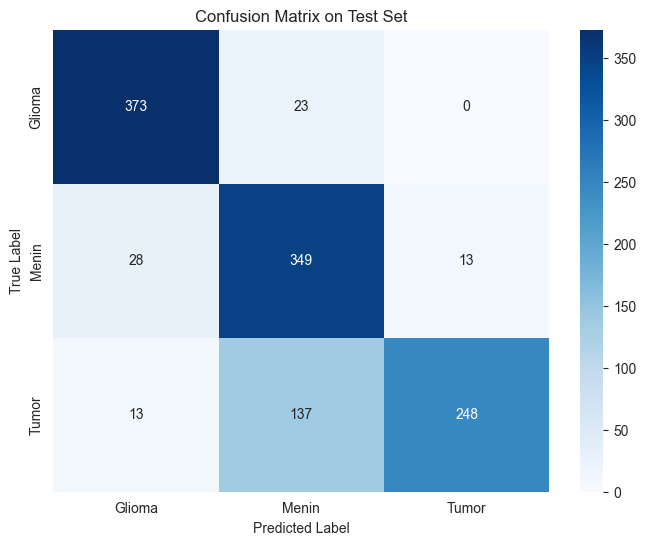

Confusion matrix heatmap displayed (or saved if in non-interactive environment).


In [218]:
# Plot Confusion Matrix Heatmap

print("\nAttempting to plot confusion matrix heatmap...")

can_plot_cm = True
missing_for_plot = []

if 'cm' not in globals() or cm is None:
    missing_for_plot.append('cm (confusion matrix)')
    can_plot_cm = False
if 'CLASS_LABELS' not in globals() or not CLASS_LABELS:
    missing_for_plot.append('CLASS_LABELS (for tick labels)')
if 'plt' not in globals() : # Check if matplotlib.pyplot was imported
    missing_for_plot.append('matplotlib.pyplot (plt)')
    can_plot_cm = False
if 'sns' not in globals() : # Check if seaborn was imported
    missing_for_plot.append('seaborn (sns)')
    can_plot_cm = False


if can_plot_cm:
    try:
        if not CLASS_LABELS:
            print("Warning: CLASS_LABELS not defined. Heatmap will lack meaningful tick labels.")
            xticklabels_plot = False # Seaborn handles False by not showing labels
            yticklabels_plot = False
        else:
            # Ensure cm dimensions match CLASS_LABELS length if CLASS_LABELS are provided
            if cm.shape[0] != len(CLASS_LABELS) or cm.shape[1] != len(CLASS_LABELS):
                print(f"Warning: Confusion matrix dimensions ({cm.shape}) do not match CLASS_LABELS length ({len(CLASS_LABELS)}). Plotting without labels.")
                xticklabels_plot = False
                yticklabels_plot = False
            else:
                xticklabels_plot = CLASS_LABELS
                yticklabels_plot = CLASS_LABELS

                print("\n--- Brief Confusion Matrix Interpretation ---")
        # Ensure CLASS_LABELS is defined, and cm exists and has the expected shape.
        # The script should ensure CLASS_LABELS is ['Glioma', 'Menin', 'Tumor'] for this logic.
        if 'cm' in locals() and hasattr(cm, 'shape') and 'CLASS_LABELS' in globals() and \
           isinstance(CLASS_LABELS, list) and len(CLASS_LABELS) == 3 and cm.shape == (3, 3):
            # Glioma
            glioma_correct = cm[0,0]
            glioma_as_menin = cm[0,1]
            glioma_as_tumor = cm[0,2]
            print(f"{CLASS_LABELS[0]}: {glioma_correct} correctly predicted.")
            if glioma_as_menin > 0 or glioma_as_tumor > 0:
                if glioma_as_menin > 0:
                    print(f"  - Misclassified as {CLASS_LABELS[1]}: {glioma_as_menin} times.")
                if glioma_as_tumor > 0:
                    print(f"  - Misclassified as {CLASS_LABELS[2]}: {glioma_as_tumor} times.")

            # Menin
            menin_correct = cm[1,1]
            menin_as_glioma = cm[1,0]
            menin_as_tumor = cm[1,2]
            print(f"{CLASS_LABELS[1]}: {menin_correct} correctly predicted.")
            if menin_as_glioma > 0 or menin_as_tumor > 0:
                if menin_as_glioma > 0: print(f"  - Misclassified as {CLASS_LABELS[0]}: {menin_as_glioma} times.")
                if menin_as_tumor > 0: print(f"  - Misclassified as {CLASS_LABELS[2]}: {menin_as_tumor} times.")
            elif menin_as_glioma == 0 and menin_as_tumor == 0: # If Menin was perfectly classified against the other two
                print(f"  - Notably, never misclassified as {CLASS_LABELS[0]}.")


            # Tumor
            tumor_correct = cm[2,2]
            tumor_as_glioma = cm[2,0]
            tumor_as_menin = cm[2,1]
            print(f"{CLASS_LABELS[2]}: {tumor_correct} correctly predicted.")
            if tumor_as_glioma > 0 or tumor_as_menin > 0:
                if tumor_as_glioma > 0: print(f"  - Misclassified as {CLASS_LABELS[0]}: {tumor_as_glioma} times.")
                if tumor_as_menin > 0: print(f"  - Misclassified as {CLASS_LABELS[1]}: {tumor_as_menin} times.")
            elif tumor_as_glioma == 0 and tumor_as_menin == 0: # If Tumor was perfectly classified against the other two
                print(f"  - Notably, never misclassified as {CLASS_LABELS[0]}.")

        else:
            # This 'else' corresponds to the outer 'if' checking cm, CLASS_LABELS, and shape.
            print("Could not generate detailed interpretation; 'cm' not found, or matrix shape/CLASS_LABELS unexpected.")

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=xticklabels_plot, yticklabels=yticklabels_plot)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix on Test Set')
        plt.show()
        print("Confusion matrix heatmap displayed (or saved if in non-interactive environment).")
    except AttributeError as ae:
        print(f"AttributeError during plotting (e.g. 'NoneType' object has no attribute 'savefig'): {ae}. Was 'plt' or 'sns' properly imported/available?")
    except Exception as e:
        print(f"An error occurred during confusion matrix plotting: {e}")
else:
    print(f"Cannot plot confusion matrix. Missing or unavailable: {', '.join(missing_for_plot)}.")

## Visual Detection

Model loaded successfully from final_trained_customcnn.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


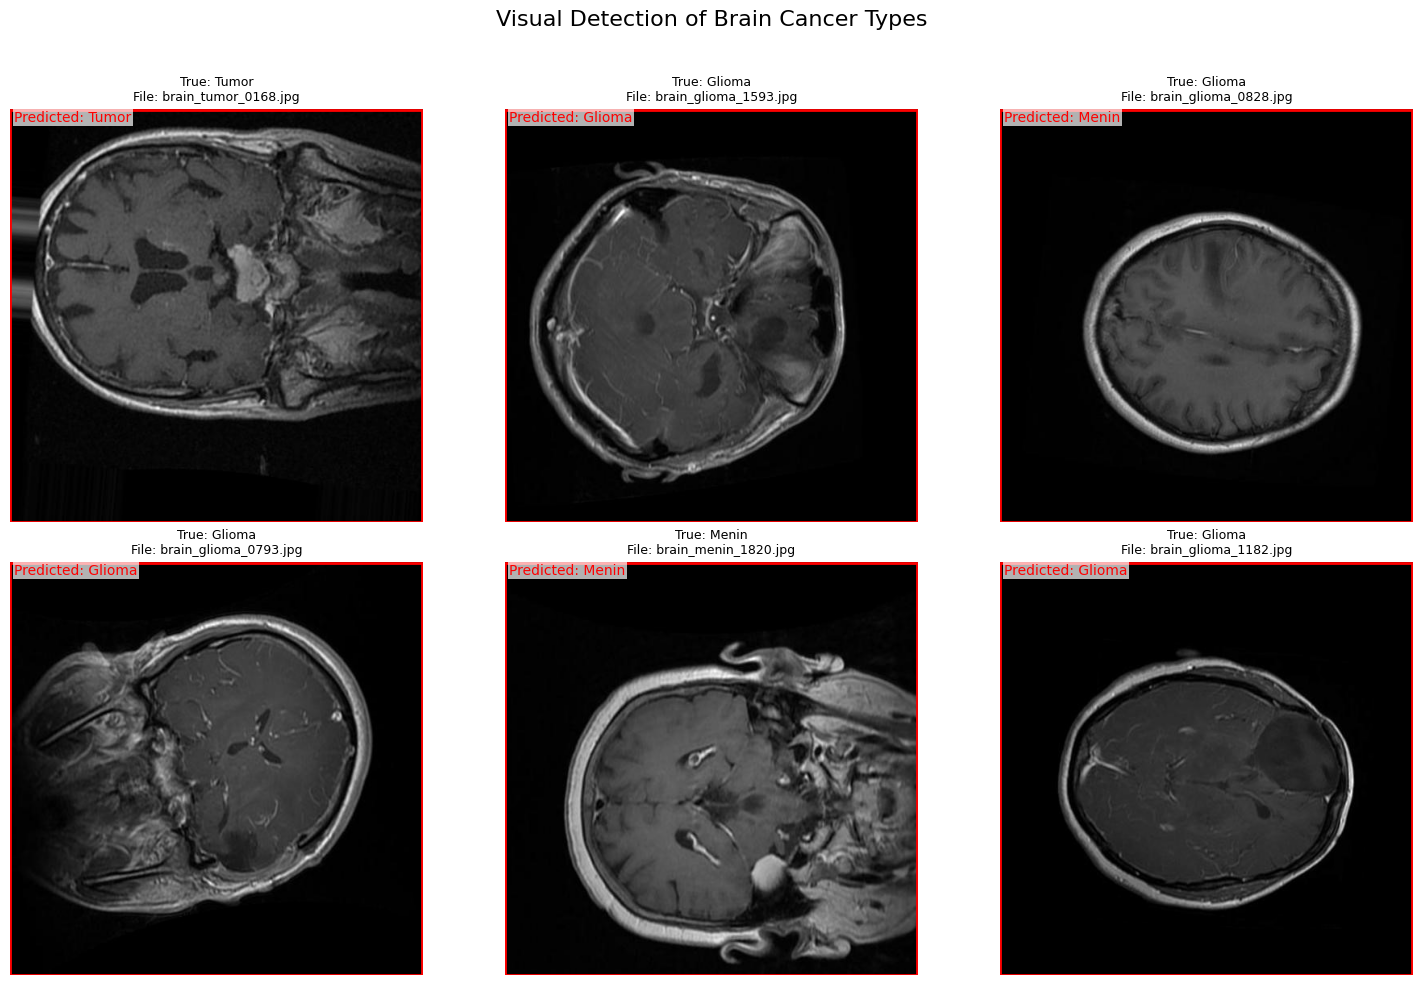

In [3]:
import os
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# --- Configuration ---
MODEL_PATH = 'final_trained_customcnn.h5'  # Relative to workspace root
DATASET_BASE_PATH = 'Brain_Cancer raw MRI data/Brain_Cancer/'
SUB_DIR_MAP = {'brain_glioma': 'Glioma', 'brain_menin': 'Menin', 'brain_tumor': 'Tumor'}
CLASS_LABELS = ['Glioma', 'Menin', 'Tumor'] # As per instruction e.g.
IMG_HEIGHT = 224
IMG_WIDTH = 224
NUM_IMAGES_TO_DISPLAY = 6 # Define the number of images to display
GRID_ROWS = 2
GRID_COLS = 3

def preprocess_image(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH)):
    """Loads and preprocesses an image for model prediction."""
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Rescale
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def get_true_label_from_filename(image_path):
    """Infers a 'true' label from the image filename for demonstration."""
    filename = os.path.basename(image_path).lower()
    if 'glioma' in filename:
        return 'Glioma'
    elif 'menin' in filename:
        return 'Menin' # Assuming 'Menin' corresponds to Meningioma for CLASS_LABELS
    elif 'tumor' in filename:
        return 'Tumor' # Assuming 'Tumor' corresponds to Pituitary or other for CLASS_LABELS
    return 'Unknown'

# --- Dynamic Image Selection ---
all_image_files_with_labels = []
if os.path.exists(DATASET_BASE_PATH):
    for class_subdir_name, true_label in SUB_DIR_MAP.items():
        class_path = os.path.join(DATASET_BASE_PATH, class_subdir_name)
        if os.path.isdir(class_path):
            image_patterns = ['*.jpg', '*.jpeg', '*.png']
            for pattern in image_patterns:
                for img_path in glob.glob(os.path.join(class_path, pattern)):
                    all_image_files_with_labels.append({'path': img_path, 'true_label': true_label})
        else:
            print(f"Warning: Class subdirectory not found at {class_path}")
else:
    print(f"Error: Dataset base path not found at {DATASET_BASE_PATH}")
    all_image_files_with_labels = [] # Ensure it's empty if path fails

selected_samples = []
if not all_image_files_with_labels:
    print("Error: No images found in the dataset directory. Cannot proceed with visual detection.")
else:
    num_to_select = min(NUM_IMAGES_TO_DISPLAY, len(all_image_files_with_labels))
    if len(all_image_files_with_labels) < NUM_IMAGES_TO_DISPLAY:
        print(f"Warning: Requested {NUM_IMAGES_TO_DISPLAY} images, but only found {len(all_image_files_with_labels)}. Displaying all found.")
    selected_samples = random.sample(all_image_files_with_labels, num_to_select)

IMAGE_PATHS = [sample['path'] for sample in selected_samples] 

if not os.path.exists(MODEL_PATH):
    print(f"Error: Model file not found at {MODEL_PATH}")
    print("Please ensure the model is in the workspace root directory.")

if not os.path.exists(MODEL_PATH):
    print(f"Error: Model file not found at {MODEL_PATH}")
    print("Please ensure the model is in the workspace root directory.")

# Load the trained model
try:
    model = load_model(MODEL_PATH)
    print(f"Model loaded successfully from {MODEL_PATH}")
except Exception as e:
    print(f"Error loading model: {e}")
    # return # This will be a SyntaxError at top level.

if not selected_samples: # Check if selected_samples is empty
    print("No images were selected for display. Exiting.")

elif NUM_IMAGES_TO_DISPLAY == 0: # This check might be redundant if selected_samples handles it
    print("No images specified for display.")
    # return

plt.figure(figsize=(15, 10)) # Adjust figure size as needed

for i, sample_info in enumerate(selected_samples):
    if i >= GRID_ROWS * GRID_COLS: # This check is still relevant for grid size
        print(f"Warning: More images selected than can fit in the {GRID_ROWS}x{GRID_COLS} grid. Skipping further images.")
        break

    image_path = sample_info['path']
    true_label_for_display = sample_info['true_label']

    # Preprocess the image for the model
    processed_image_array = preprocess_image(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))

    # Make prediction
    prediction = model.predict(processed_image_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_label = CLASS_LABELS[predicted_class_index]

    # Load original image for display
    try:
        original_img = Image.open(image_path)
    except FileNotFoundError: # Should not happen if glob worked, but good for robustness
        print(f"Error: Image file not found at {image_path}")
        continue
    

    # Display
    plt.subplot(GRID_ROWS, GRID_COLS, i + 1)
    plt.imshow(original_img)
    
    current_ax = plt.gca()
    
    rect_width = original_img.width -1 # Ensure border is visible
    rect_height = original_img.height -1 # Ensure border is visible
    current_ax.add_patch(
        patches.Rectangle(
            (0, 0),  # Bottom-left corner
            rect_width,
            rect_height,
            edgecolor='red',
            facecolor='none',
            lw=2  # Line width
        )
    )
    
    plt.text(
        5, 15,  # x, y position of text (adjust as needed)
        f"Predicted: {predicted_label}",
        color='red',
        fontsize=10, # Adjusted for better fit
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
    )
    
    plt.axis('off')
    plt.title(f"True: {true_label_for_display}\nFile: {os.path.basename(image_path)}", fontsize=9)

plt.suptitle("Visual Detection of Brain Cancer Types", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()